In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
tele_df=pd.read_csv("telecom_churn_data.csv")

## Data exploration

In [4]:
tele_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
tele_df.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6      ...        sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000      ...       99999.000000  25153.000000  25571.000000   
mean     132.395875      ...           0.084581      0.914404      0.908764   
std      297.207406      ...           0.650457      0.279772      0.287950   
min        0.000000      ...           0.000000      0.000000      0.000000   
25%        7.380000      ...           0.000000      1.000000      1.000000   
50%       34.310000      ...           0.000000      1.000000      1.000000   
75%      118.740000      ...           0.000000      1.000000      1.000000   
max     7376.710000      ...          49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

## Data preperation

In [6]:
amt_df=tele_df[tele_df.columns[tele_df.columns.str.find('rech')!=-1]].copy()
amt_df=amt_df.fillna(0)

In [7]:
amt_df.columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [8]:
amt_df[['total_rech_num_6','total_rech_amt_6','max_rech_amt_6','total_rech_data_6', 'count_rech_2g_6','count_rech_3g_6','av_rech_amt_data_6',]]

total_rech_num_6  total_rech_amt_6  max_rech_amt_6  total_rech_data_6  \
0                     4               362             252                1.0   
1                     4                74              44                0.0   
2                     5               168              86                0.0   
3                    10               230              60                0.0   
4                     5               196              56                1.0   
5                     2               120             120                0.0   
6                    15               499              90                0.0   
7                     5              1580            1580                0.0   
8                    19               437              90                0.0   
9                     4               220             110                0.0   
10                    1                 0               0                0.0   
11                    6               366             110                0.0   
12                    2               110             110                0.0   
13                    6               507             110                0.0   
14                    7                60              10                0.0   
15                    1                 0               0                0.0   
16                   10               570             110                0.0   
17                   19               816             110                0.0   
18                    1                 0               0                0.0   
19                    2               154             154                1.0   
20                    6               437             250                0.0   
21                   22               600              50                0.0   
22                    4               255             110                0.0   
23                    3                 0               0                0.0   
24                    5               440             110                0.0   
25                    5               256             110                0.0   
26                    0                 0               0                0.0   
27                    4                60              60                0.0   
28                    3                90              50                0.0   
29                    8               196              50                0.0   
...                 ...               ...             ...                ...   
99969                 5               148              46                3.0   
99970                11               337              90                1.0   
99971                 1               110             110                0.0   
99972                 1                 0               0                0.0   
99973                 1                27              27                0.0   
99974                 8               520             120                0.0   
99975                 4               120              50                0.0   
99976                 4               214              99                0.0   
99977                 4                40              20                0.0   
99978                 1                 0               0                0.0   
99979                 2                 0               0                0.0   
99980                19               636             110                1.0   
99981                 2               252             252                1.0   
99982                 4               154             154                1.0   
99983                23               220              10                0.0   
99984                 8               360             154                1.0   
99985                 1                97              97                0.0   
99986                 6               567             550                1.0   
99987  

In [9]:
#len(amt_df[amt_df['total_rech_amt_6']<amt_df['av_rech_amt_data_6']])

#### Columns which reflect the total amount spent by a user are total_rech_amt_month and av_rech_amt_data_month

In [10]:
amt_df['total_rech_data_amt_6']=amt_df['total_rech_amt_6']+(amt_df['total_rech_data_6']*amt_df['av_rech_amt_data_6'])
amt_df['total_rech_data_amt_7']=amt_df['total_rech_amt_7']+(amt_df['total_rech_data_7']*amt_df['av_rech_amt_data_7'])
amt_df['total_rech_data_amt_8']=amt_df['total_rech_amt_8']+(amt_df['total_rech_data_8']*amt_df['av_rech_amt_data_8'])
amt_df['total_rech_data_amt_9']=amt_df['total_rech_amt_9']+(amt_df['total_rech_data_9']*amt_df['av_rech_amt_data_9'])

In [11]:
amt_df['mobile_number']=tele_df['mobile_number']

In [12]:
amt_df['avg_6_7']=(amt_df['total_rech_data_amt_6']+amt_df['total_rech_data_amt_7'])/2
perc_70=amt_df['avg_6_7'].quantile(0.7)
perc_70

478.0

In [13]:
high_value_df=tele_df[amt_df['avg_6_7']>perc_70]

In [14]:
len(high_value_df)

29953

In [15]:
def calculate_churn(row):
    if(row['total_ic_mou_9']!=0 or row['total_og_mou_9']!=0 or row['vol_2g_mb_9']!=0 or row['vol_3g_mb_9']!=0):
        return 0
    else:
        return 1
        

In [16]:
high_value_df['churn']=high_value_df.apply(calculate_churn,axis=1)

In [17]:
high_value_df['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [18]:
high_value_df['churn'].value_counts()*100/len(high_value_df)

0    91.877274
1     8.122726
Name: churn, dtype: float64

In [19]:
high_value_df.drop(['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'],axis=1, inplace=True)

In [20]:
high_value_df[high_value_df.columns[high_value_df.columns.str.find('_9')!=-1]].columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9',

In [21]:
high_value_df.drop(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9'],axis=1, inplace=True)

In [22]:
high_value_df[high_value_df.columns[high_value_df.columns.str.find('sep')!=-1]].columns

Index(['sep_vbc_3g'], dtype='object')

In [23]:
high_value_df.drop(['sep_vbc_3g'],axis=1, inplace=True)

In [24]:
high_value_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7  ...    sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0    214.816  ...              0            0        1.0        1.0   
7   1349.850  ...              0            0        NaN        NaN   
8    492.223  ...              0            0        NaN        1.0   
21   597.753  ...              0            0        NaN        NaN   
23   193.897  ...              0            1        NaN        1.0   

    fb_user_8  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn  
0         1.0  968       30.40        0.00      101.20      1  
7         NaN  802       57.74       19.38       18.74      1  
8         1.0  315       21.03      910.65      122.16      0  
21        NaN  720        0.00        0.00        0.00      0  
23        1.0  604       40.45       51.86        0.00      0  

[5 rows x 172 columns]

In [25]:
high_value_df.columns[ high_value_df.nunique()==30001]

Index([], dtype='object')

In [26]:
high_value_df.columns[ high_value_df.nunique()==1]

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype='object')

In [27]:
high_value_df.drop(['mobile_number','circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],axis=1,inplace=True)

In [28]:
high_value_df.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29411.000000  29417.000000   
mean     558.820058    561.160547    508.890301    265.708886    272.935850   
std      460.868223    480.028497    502.136278    462.692744    483.282132   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
25%      310.142000    310.071000    231.615000     19.250000     18.180000   
50%      482.354000    481.496000    427.604000     88.140000     86.890000   
75%      700.240000    698.829000    661.753000    297.490000    298.380000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  28781.000000  29411.000000  29417.000000  28781.000000   29411.000000   
mean     243.888097    380.688975    385.124799    348.769656      16.421142   
std      465.505577    484.441095    501.024091    486.836956      77.012820   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%       14.280000     78.550000     76.180000     58.760000       0.000000   
50%       72.990000    229.630000    227.130000    197.690000       0.000000   
75%      255.310000    494.755000    500.480000    455.440000       0.000000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

           ...        sachet_3g_7   sachet_3g_8     fb_user_6     fb_user_7  \
count      ...       29953.000000  29953.000000  16740.000000  17038.000000   
mean       ...           0.227790      0.202451      0.926583      0.921763   
std        ...           1.090717      1.100735      0.260827      0.268552   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      1.000000      1.000000   
50%        ...           0.000000      0.000000      1.000000      1.000000   
75%        ...           0.000000      0.000000      1.000000      1.000000   
max        ...          35.000000     41.000000      1.000000      1.000000   

          fb_user_8           aon    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g  \
count  15935.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean       0.897207   1209.280573    169.276670    179.057629    158.731865   
std        0.303697    957.449442    421.128001    443.756247    416.989501   
min        0.000000    180.000000      0.000000      0.000000      0.000000   
25%        1.000000    460.000000      0.000000      0.000000      0.000000   
50%        1.000000    846.000000      0.000000      0.000000      0.000000   
75%        1.000000   1756.000000    129.130000    137.860000     98.750000   
max        1.000000   4321.000000  12916.220000   9165.600000  11166.210000   

              churn  
count  29953.000000  
mean       0.081227  
std        0.273188  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 152 columns]

In [29]:
high_value_df[high_value_df.columns[high_value_df.columns.str.find('date')!=-1]].columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [30]:
per_df=pd.DataFrame(high_value_df.isnull().sum()*100/ len(high_value_df)).reset_index()
per_df.columns=['col_name','percentage']
per_df[per_df['percentage']!=0].sort_values('percentage', axis=0, ascending=False)

col_name  percentage
152                 fb_user_8   46.799987
107  date_of_last_rech_data_8   46.799987
110         total_rech_data_8   46.799987
137          night_pck_user_8   46.799987
113           max_rech_data_8   46.799987
116           count_rech_2g_8   46.799987
134                 arpu_2g_8   46.799987
119           count_rech_3g_8   46.799987
122        av_rech_amt_data_8   46.799987
131                 arpu_3g_8   46.799987
129                 arpu_3g_6   44.112443
105  date_of_last_rech_data_6   44.112443
108         total_rech_data_6   44.112443
111           max_rech_data_6   44.112443
117           count_rech_3g_6   44.112443
120        av_rech_amt_data_6   44.112443
114           count_rech_2g_6   44.112443
150                 fb_user_6   44.112443
135          night_pck_user_6   44.112443
132                 arpu_2g_6   44.112443
130                 arpu_3g_7   43.117551
109         total_rech_data_7   43.117551
136          night_pck_user_7   43.117551
112           max_rech_data_7   43.117551
115           count_rech_2g_7   43.117551
151                 fb_user_7   43.117551
106  date_of_last_rech_data_7   43.117551
118           count_rech_3g_7   43.117551
133                 arpu_2g_7   43.117551
121        av_rech_amt_data_7   43.117551
..                        ...         ...
6                offnet_mou_6    1.809502
19           loc_og_t2m_mou_7    1.789470
16           loc_og_t2t_mou_7    1.789470
22           loc_og_t2f_mou_7    1.789470
25           loc_og_t2c_mou_7    1.789470
13              roam_og_mou_7    1.789470
28               loc_og_mou_7    1.789470
10              roam_ic_mou_7    1.789470
7                offnet_mou_7    1.789470
31           std_og_t2t_mou_7    1.789470
70           std_ic_t2m_mou_7    1.789470
34           std_og_t2m_mou_7    1.789470
58           loc_ic_t2m_mou_7    1.789470
67           std_ic_t2t_mou_7    1.789470
73           std_ic_t2f_mou_7    1.789470
64               loc_ic_mou_7    1.789470
76               std_ic_mou_7    1.789470
4                 onnet_mou_7    1.789470
61           loc_ic_t2f_mou_7    1.789470
82               spl_ic_mou_7    1.789470
85               isd_ic_mou_7    1.789470
37           std_og_t2f_mou_7    1.789470
55           loc_ic_t2t_mou_7    1.789470
88                ic_others_7    1.789470
49                og_others_7    1.789470
46               spl_og_mou_7    1.789470
43               isd_og_mou_7    1.789470
40               std_og_mou_7    1.789470
100       date_of_last_rech_7    0.327179
99        date_of_last_rech_6    0.243715

[114 rows x 2 columns]

In [31]:
#per_df[per_df['col_name'].str.find('date')!=-1].sort_values('percentage', axis=0, ascending=False)

In [32]:
#high_value_df.select_dtypes(include=[np.number]).columns

#high_value_df.select_dtypes('object').columns

#high_value_df.columns

In [33]:
cat_cols=['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
        'date_of_last_rech_data_6', 'date_of_last_rech_data_7','date_of_last_rech_data_8',
        'night_pck_user_6','night_pck_user_7','night_pck_user_8',
        'fb_user_6','fb_user_7','fb_user_8']

In [34]:
num_cols=high_value_df[high_value_df.columns.difference(cat_cols)].columns

In [35]:
high_value_df[num_cols].describe()

aon     arpu_2g_6     arpu_2g_7     arpu_2g_8     arpu_3g_6  \
count  29953.000000  16740.000000  17038.000000  15935.000000  16740.000000   
mean    1209.280573    113.672310    113.907625    109.877727    120.055618   
std      957.449442    201.863076    206.150982    195.417759    226.164119   
min      180.000000    -15.320000    -15.480000    -24.430000    -30.280000   
25%      460.000000      0.010000      0.000000      0.000000      0.000000   
50%      846.000000     27.085000     24.065000     20.000000     15.605000   
75%     1756.000000    168.745000    167.670000    157.525000    178.345000   
max     4321.000000   6433.760000   4809.360000   3467.170000   6362.280000   

          arpu_3g_7     arpu_3g_8        arpu_6        arpu_7        arpu_8  \
count  17038.000000  15935.000000  29953.000000  29953.000000  29953.000000   
mean     120.810794    118.106064    558.820058    561.160547    508.890301   
std      229.671975    218.976760    460.868223    480.028497    502.136278   
min      -26.040000    -24.490000  -2258.709000  -2014.045000   -945.808000   
25%        0.000000      0.000000    310.142000    310.071000    231.615000   
50%       13.000000     10.020000    482.354000    481.496000    427.604000   
75%      180.522500    179.630000    700.240000    698.829000    661.753000   
max     4980.900000   3716.900000  27731.088000  35145.834000  33543.624000   

           ...       total_rech_data_8  total_rech_num_6  total_rech_num_7  \
count      ...            15935.000000      29953.000000      29953.000000   
mean       ...                3.050769         11.853804         11.724635   
std        ...                3.540332          9.428779          9.434662   
min        ...                1.000000          0.000000          0.000000   
25%        ...                1.000000          6.000000          6.000000   
50%        ...                2.000000          9.000000          9.000000   
75%        ...                4.000000         15.000000         15.000000   
max        ...               60.000000        307.000000        138.000000   

       total_rech_num_8   vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8  \
count      29953.000000  29953.000000  29953.000000  29953.000000   
mean           9.975595    126.522998    125.113401    105.873758   
std            9.276133    330.332119    331.507174    313.058933   
min            0.000000      0.000000      0.000000      0.000000   
25%            4.000000      0.000000      0.000000      0.000000   
50%            8.000000      0.010000      0.050000      0.000000   
75%           13.000000     83.670000     77.900000     51.690000   
max          196.000000  10285.900000   7873.550000  11117.610000   

        vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8  
count  29953.000000  29953.000000  29953.000000  
mean     344.663785    370.544870    351.830019  
std      914.355157    916.078806    919.528372  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%      359.450000    411.000000    356.900000  
max    45735.400000  28144.120000  30036.060000  

[8 rows x 146 columns]

### Identifying columns with outliers

In [36]:
for col in num_cols:
    q1=high_value_df[col].quantile(0.25)
    q3=high_value_df[col].quantile(0.75)
    diff=q3-q1
    lower=q1-(diff*1.5)
    upper=q3+(diff*1.5)
    print(col)
    if(high_value_df[col].quantile(1)>upper or high_value_df[col].quantile(0)<lower):
        print('True')
    else:
        print('False')

aon
True
arpu_2g_6
True
arpu_2g_7
True
arpu_2g_8
True
arpu_3g_6
True
arpu_3g_7
True
arpu_3g_8
True
arpu_6
True
arpu_7
True
arpu_8
True
aug_vbc_3g
True
av_rech_amt_data_6
True
av_rech_amt_data_7
True
av_rech_amt_data_8
True
churn
True
count_rech_2g_6
True
count_rech_2g_7
True
count_rech_2g_8
True
count_rech_3g_6
True
count_rech_3g_7
True
count_rech_3g_8
True
ic_others_6
True
ic_others_7
True
ic_others_8
True
isd_ic_mou_6
True
isd_ic_mou_7
True
isd_ic_mou_8
True
isd_og_mou_6
True
isd_og_mou_7
True
isd_og_mou_8
True
jul_vbc_3g
True
jun_vbc_3g
True
last_day_rch_amt_6
True
last_day_rch_amt_7
True
last_day_rch_amt_8
True
loc_ic_mou_6
True
loc_ic_mou_7
True
loc_ic_mou_8
True
loc_ic_t2f_mou_6
True
loc_ic_t2f_mou_7
True
loc_ic_t2f_mou_8
True
loc_ic_t2m_mou_6
True
loc_ic_t2m_mou_7
True
loc_ic_t2m_mou_8
True
loc_ic_t2t_mou_6
True
loc_ic_t2t_mou_7
True
loc_ic_t2t_mou_8
True
loc_og_mou_6
True
loc_og_mou_7
True
loc_og_mou_8
True
loc_og_t2c_mou_6
True
loc_og_t2c_mou_7
True
loc_og_t2c_mou_8
True
loc_o

In [37]:
# aon is only value which satisy the condition

In [38]:
df_aon = high_value_df['aon']
mean_value = df_aon.mean()
df_aon = df_aon.fillna(mean_value)

In [39]:
#Imputing numerical data with missing values using mean for training set
df_num = high_value_df[num_cols.difference(['aon'])]
mode_value = df_num.mode()
for column in num_cols.difference(['aon']):
    df_num[column].fillna(mode_value[column].values[0], inplace=True)

In [40]:
#df_num

In [41]:
#Imputing categorical data with missing values using mode for training set
df_cat = high_value_df[cat_cols]
mode_value = df_cat.mode()
for column in cat_cols:
    df_cat[column].fillna(mode_value[column].values[0], inplace=True)

In [42]:
#Combining the numerical and categorical data back for training set
df_imputed = pd.concat([df_aon,df_num, df_cat], axis=1)

In [43]:
per_df=pd.DataFrame(df_imputed.isnull().sum()*100/ len(df_imputed)).reset_index()
per_df.columns=['col_name','percentage']
per_df[per_df['percentage']!=0].sort_values('percentage', axis=0, ascending=False)

Empty DataFrame
Columns: [col_name, percentage]
Index: []

### Derived Metrics

#### 1)total_data_amt - total data amount
#### 2)total_rech_data_amt - total data amount + total talktime amount
#### 3)Good months - Average of 6th and 7th month
#### 4)Action months - 8th month

In [44]:
df_imputed['total_data_amt_6']=df_imputed['total_rech_data_6']*df_imputed['av_rech_amt_data_6']
df_imputed['total_data_amt_7']=df_imputed['total_rech_data_7']*df_imputed['av_rech_amt_data_7']
df_imputed['total_data_amt_8']=df_imputed['total_rech_data_8']*df_imputed['av_rech_amt_data_8']

In [45]:
df_imputed['total_rech_data_amt_6']=df_imputed['total_rech_amt_6']+df_imputed['total_data_amt_6']
df_imputed['total_rech_data_amt_7']=df_imputed['total_rech_amt_7']+df_imputed['total_data_amt_7']
df_imputed['total_rech_data_amt_8']=df_imputed['total_rech_amt_8']+df_imputed['total_data_amt_8']

In [46]:
col_list=df_imputed[df_imputed.columns[df_imputed.columns.str.find('_6')!=-1]].columns.to_series().apply(lambda x:x.replace("_6","")).reset_index()
col_list=col_list[0]

In [47]:
df_final=pd.DataFrame()

for col in col_list:
    if(col.find('date')==-1 and col.find('fb')==-1 and col.find('night')==-1):
        #print(col)
        df_final[col+'_good']=(df_imputed[col+'_6']+df_imputed[col+'_7'])/2
        df_final[col+'_action']=df_imputed[col+'_8']
    else:
        df_final[col+'_6']=df_imputed[col+'_6']
        df_final[col+'_7']=df_imputed[col+'_7']
        df_final[col+'_8']=df_imputed[col+'_8']

df_final.head()    

arpu_2g_good  arpu_2g_action  arpu_3g_good  arpu_3g_action  arpu_good  \
0         212.17          212.17       212.170          212.17   206.1005   
7           0.00            0.00         0.000            0.00  1209.5150   
8           0.00            0.00         0.000           19.83   435.4720   
21          0.00            0.00         0.000            0.00   556.1030   
23        150.89          150.67       153.285          197.27   134.1235   

    arpu_action  av_rech_amt_data_good  av_rech_amt_data_action  \
0       213.803                  252.0                    252.0   
7      3171.480                  154.0                    154.0   
8       137.362                  165.5                     69.0   
21      637.760                  154.0                    154.0   
23      366.966                  255.0                    270.0   

    count_rech_2g_good  count_rech_2g_action             ...              \
0                  0.0                   0.0             ...               
7                  1.0                   1.0             ...               
8                  1.5                   3.0             ...               
21                 1.0                   1.0             ...               
23                 0.5                   0.0             ...               

    night_pck_user_6  night_pck_user_7  night_pck_user_8  fb_user_6  \
0                0.0               0.0               0.0        1.0   
7                0.0               0.0               0.0        1.0   
8                0.0               0.0               0.0        1.0   
21               0.0               0.0               0.0        1.0   
23               0.0               0.0               0.0        1.0   

    fb_user_7  fb_user_8  total_data_amt_good  total_data_amt_action  \
0         1.0        1.0                252.0                  252.0   
7         1.0        1.0                154.0                  154.0   
8         1.0        1.0                254.0                  207.0   
21        1.0        1.0                154.0                  154.0   
23        1.0        1.0                433.0                  540.0   

    total_rech_data_amt_good  total_rech_data_amt_action  
0                      559.0                       504.0  
7                     1339.0                      3792.0  
8                      773.0                       327.0  
21                     794.0                       872.0  
23                     660.0                       979.0  

[5 rows x 110 columns]

In [48]:
#aon,churn,jul_vbc_3g,jun_vbc_3g,aug_vbc_3g to be added 
df_final['aon']=df_imputed['aon']
df_final['churn']=df_imputed['churn']
df_final['vbc_3g_good']=(df_imputed['jul_vbc_3g']+df_imputed['jun_vbc_3g'])/2
df_final['vbc_3g_action']=df_imputed['aug_vbc_3g']

In [49]:
#df_final=pd.concat([df_final,df_diff], axis=1)

In [50]:
#df_imputed.shape

In [51]:
df_final.shape

(29953, 114)

In [52]:
df_final['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [53]:
#df_final.to_csv('df_final.csv',index=False)

In [54]:
#df_imputed.to_csv('df_final.csv', index=False)

## EDA

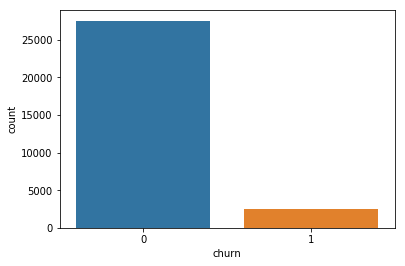

In [55]:
sns.countplot(x ='churn', data = df_final)

In [56]:
#The Churn rate in high value customersa is highly biased 

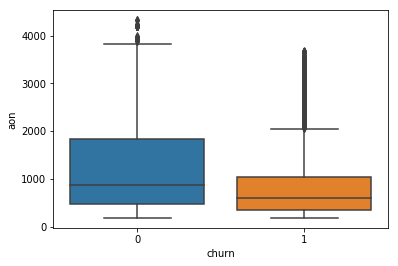

In [57]:
sns.boxplot(x="churn", y="aon", data=df_final)

In [58]:
other_df=df_final[df_final.columns[df_final.columns.str.find('other')!=-1]].copy()
spl_df=df_final[df_final.columns[df_final.columns.str.find('spl')!=-1]].copy()
df_spl_other=pd.concat([other_df,spl_df], axis=1)
df_spl_other.head()

ic_others_good  ic_others_action  og_others_good  og_others_action  \
0            0.000              0.00             0.0               0.0   
7           15.465             15.14             0.0               0.0   
8            0.000              0.00             0.0               0.0   
21           0.000              0.00             0.0               0.0   
23           2.675             13.06             0.0               0.0   

    spl_ic_mou_good  spl_ic_mou_action  spl_og_mou_good  spl_og_mou_action  
0             0.000                0.0             0.00               0.00  
7             0.105                0.0             2.25               6.50  
8             0.000                0.0             0.00              10.23  
21            0.000                0.0             0.00               0.00  
23            0.000                0.0             0.05              17.71

In [59]:
# og_df=df_imputed[df_imputed.columns[df_imputed.columns.str.find('mou_6')!=-1]].copy()
# og_df=og_df[og_df.columns[og_df.columns.str.find('og')!=-1]].copy()
# og_df
og_df=df_final[df_final.columns[df_final.columns.str.find('og_mou_good')!=-1]].copy()
og_df.head()

isd_og_mou_good  loc_og_mou_good  roam_og_mou_good  spl_og_mou_good  \
0             0.000            0.000             0.000             0.00   
7             0.090          478.035            18.165             2.25   
8             0.000          333.135             0.000             0.00   
21            0.000           95.565             0.000             0.00   
23            0.005          132.795             0.000             0.05   

    std_og_mou_good  total_og_mou_good  
0             0.000              0.000  
7            68.000            548.385  
8           136.870            470.010  
21          848.990            944.565  
23            4.355            137.210

In [60]:
ic_df=df_final[df_final.columns[df_final.columns.str.find('ic_mou_good')!=-1]].copy()
ic_df.head()

isd_ic_mou_good  loc_ic_mou_good  roam_ic_mou_good  spl_ic_mou_good  \
0             0.000            0.000              0.00            0.000   
7             8.295          391.555             24.86            0.105   
8             0.000           52.630              0.00            0.000   
21            0.000          106.505              0.00            0.000   
23           14.115          145.520              0.00            0.000   

    std_ic_mou_good  total_ic_mou_good  
0             0.000              0.000  
7           176.810            592.250  
8            13.545             66.175  
21           62.985            169.490  
23            8.915            171.235

## Important observations


Incoming:-

1) total_ic_mou=isd_ic_mou+std_ic_mou+loc_ic_mou+ic_other+spl_ic_mou

2) std_ic_mou,loc_ic_mou are most contributing values to total_ic_mou

3) loc_ic_mou=loc_ic_t2f_mou+loc_ic_t2m_mou+loc_ic_t2t_mou

4) std_ic_mou=std_ic_t2f_mou+std_ic_t2m_mou+std_ic_t2t_mou

5) roam_ic_mou  is not factored in the total_ic_mou

Outgoing:-

1) total_og_mou=isd_og_mou+std_og_mou+loc_og_mou+og_other+spl_og_mou

2) std_og_mou,loc_og_mou are most contributing values to total_og_mou

3) loc_og_mou=loc_og_t2f_mou+loc_og_t2m_mou+loc_og_t2t_mou

4) std_og_mou=std_og_t2f_mou+std_og_t2m_mou+std_og_t2t_mou

5) roam_og_mou  is not factored in the total_og_mou

Data :- 

1) total_rech_data = count_rech_2g + count_rech_3g

2) av_rech_amt_data = (amount spend on 2g + amount spent on 3g)/ total_rech_data

3) total_data_amt = av_rech_amt_data * total_rech_data

Amount :-

total_rech_data_amt = total_data_amt * total_rech_amt

In [61]:
def continous_plot(colList,df):
    fig1, axs = plt.subplots(1,2,figsize=(17,6))
    i=0
    for col in colList:
        sns.distplot(df[df['churn']==0][col],ax=axs[i])
        sns.distplot(df[df['churn']==1][col],ax=axs[i])
        fig1.legend(labels=["0","1"])
        i=i+1
    
    fig2, axs = plt.subplots(1,2,figsize=(17,6))
    j=0
    for col in colList:
        sns.boxplot(x="churn", y=col, data=df,ax=axs[j])
        j=j+1

### Plotting important columns 

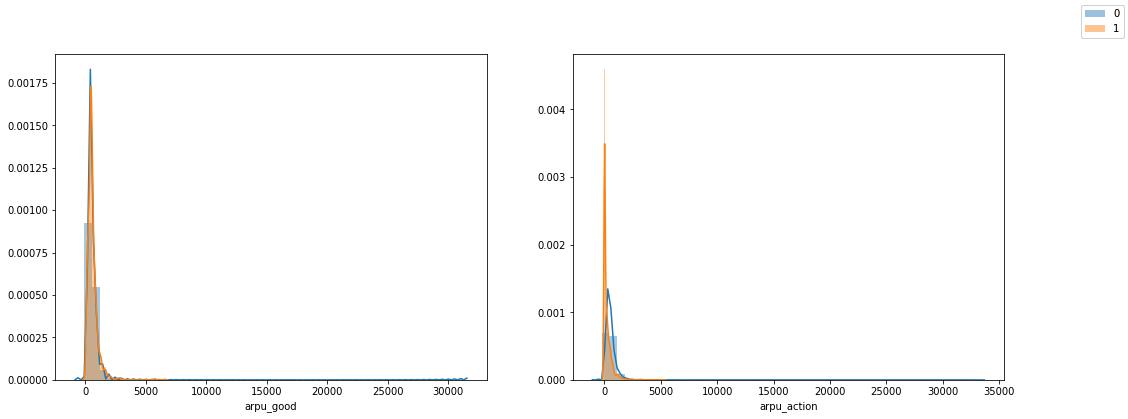

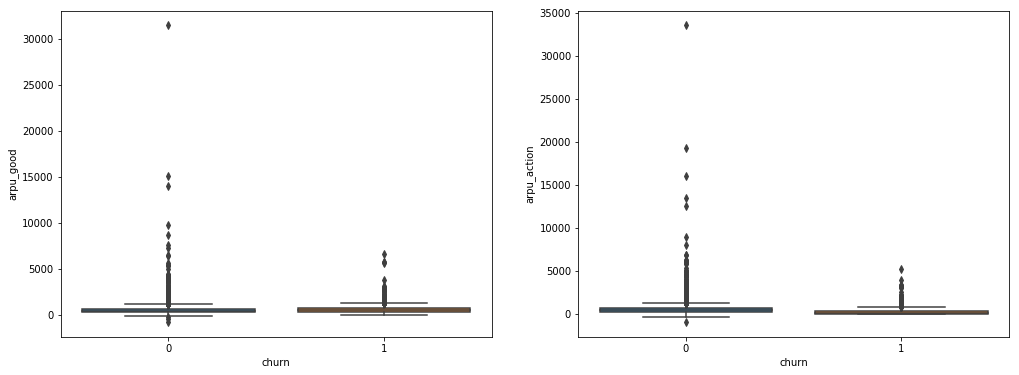

In [62]:
continous_plot(["arpu_good","arpu_action"],df_final)

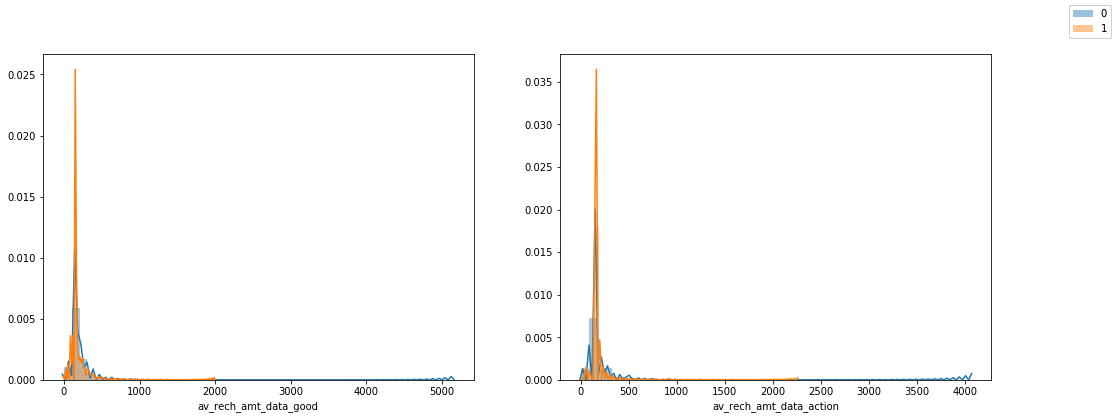

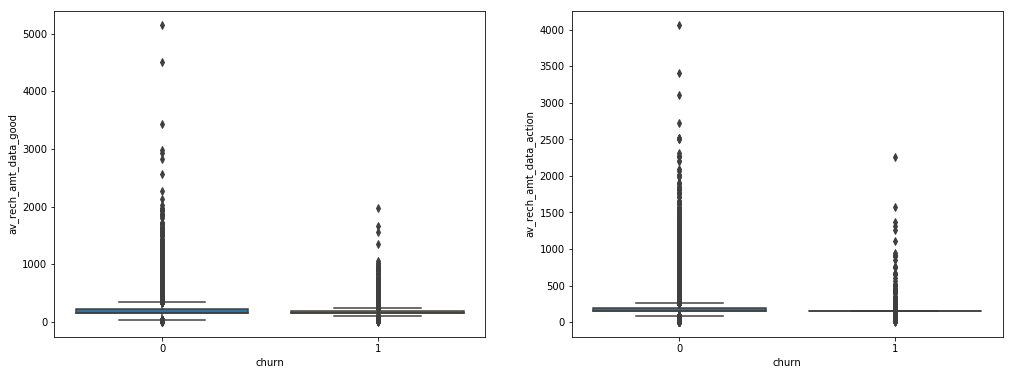

In [63]:
continous_plot(["av_rech_amt_data_good","av_rech_amt_data_action"],df_final)

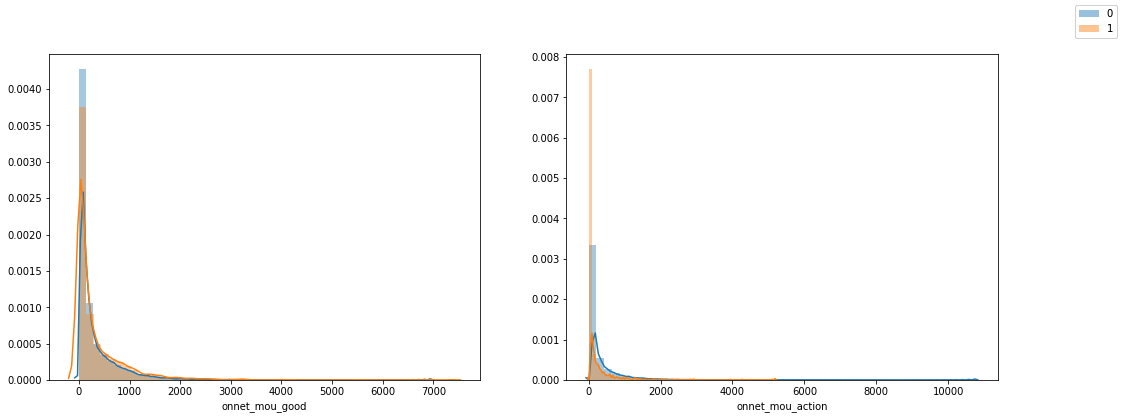

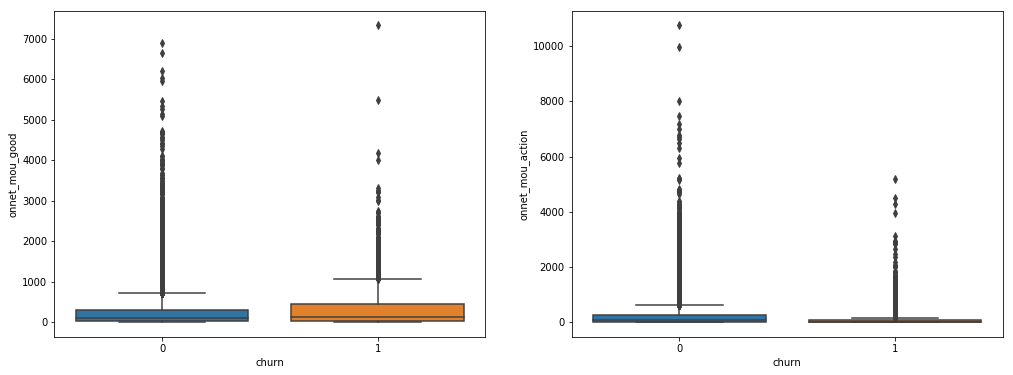

In [64]:
continous_plot(["onnet_mou_good","onnet_mou_action"],df_final)

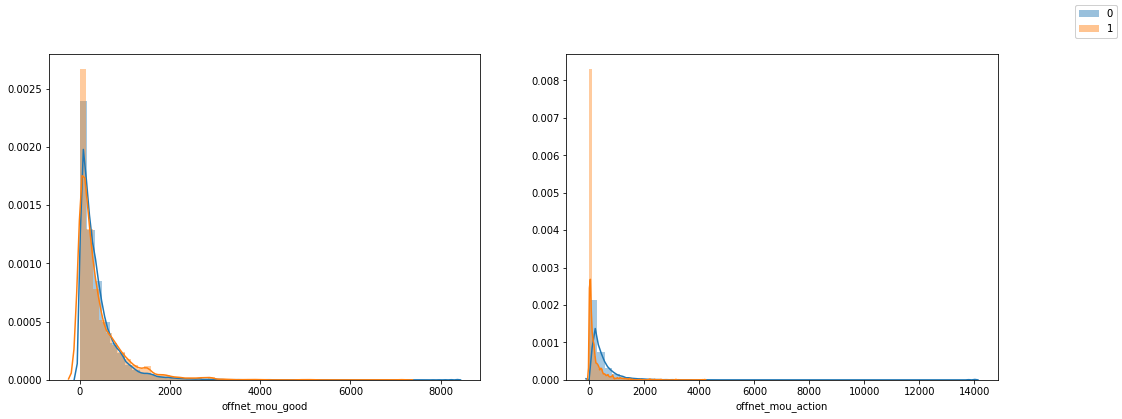

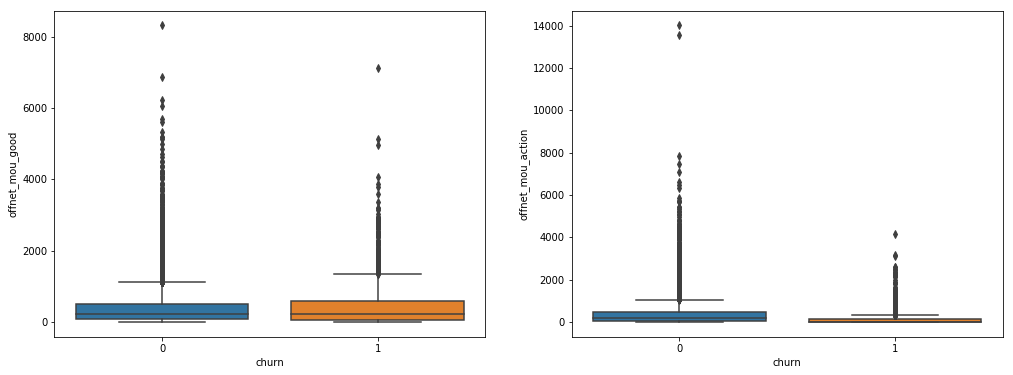

In [65]:
continous_plot(['offnet_mou_good','offnet_mou_action'],df_final)

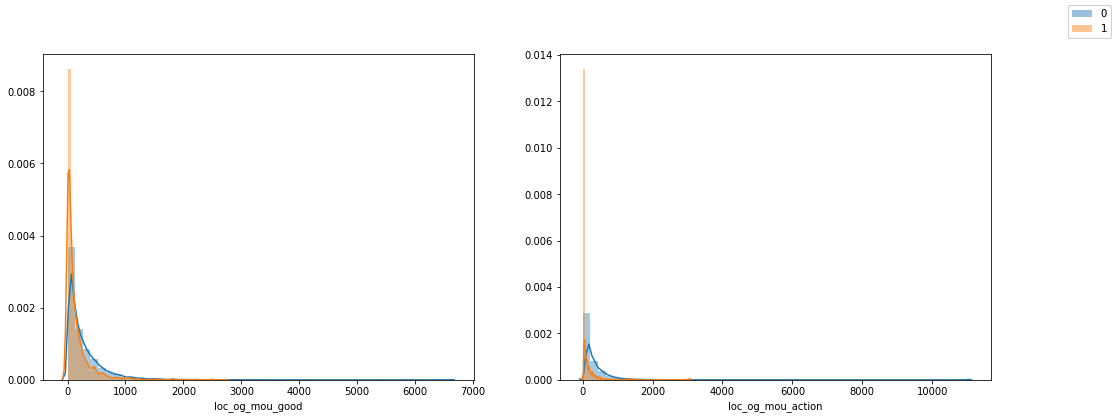

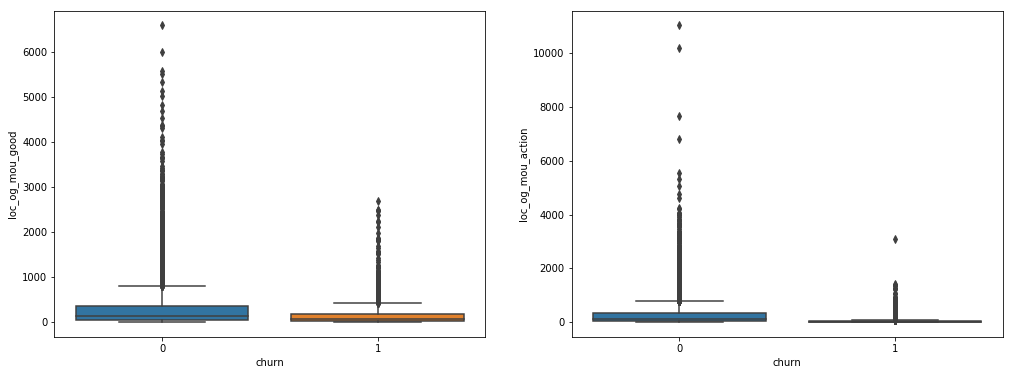

In [66]:
continous_plot(['loc_og_mou_good','loc_og_mou_action'],df_final)

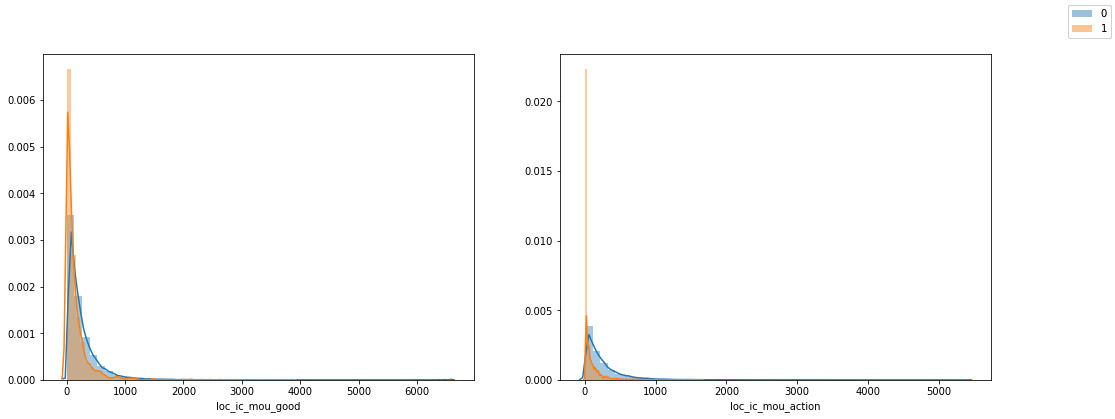

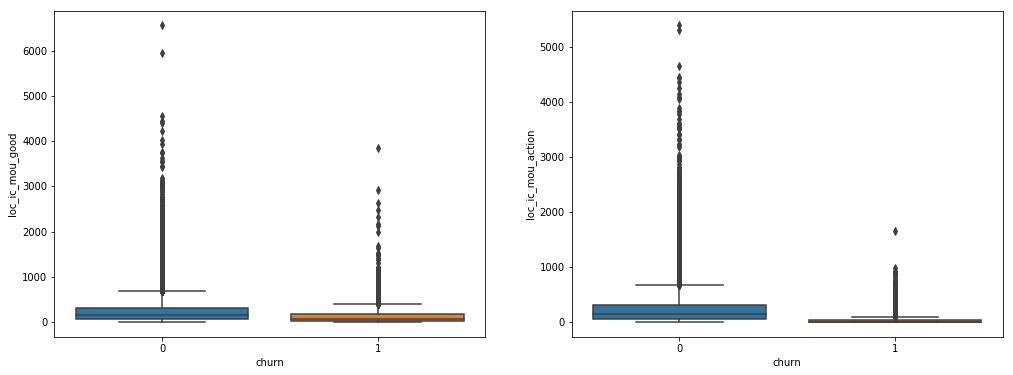

In [67]:
continous_plot(['loc_ic_mou_good','loc_ic_mou_action'],df_final)

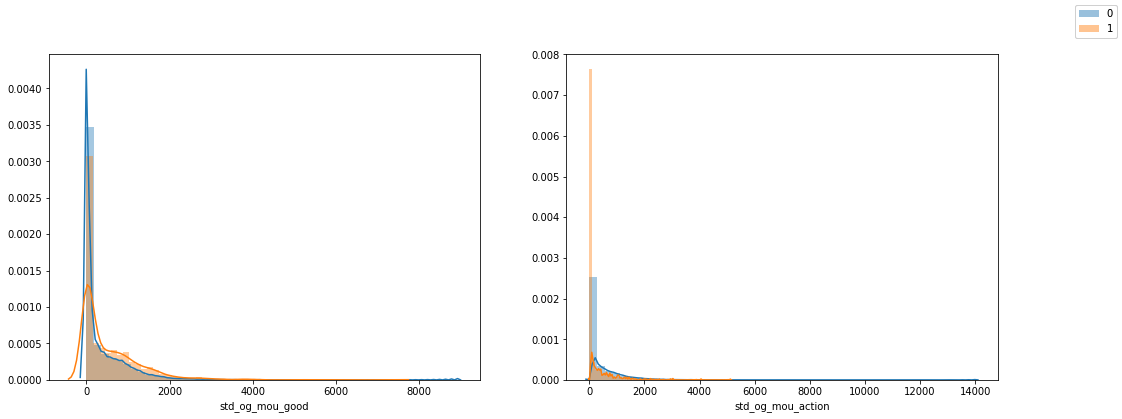

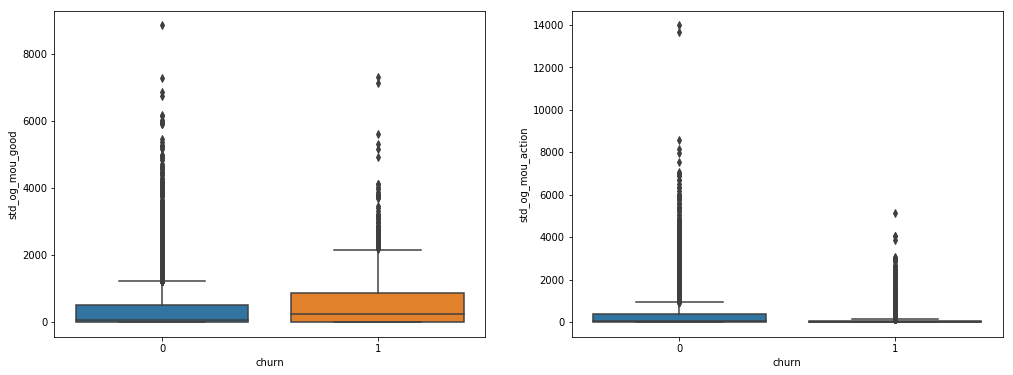

In [68]:
continous_plot(['std_og_mou_good','std_og_mou_action'],df_final)

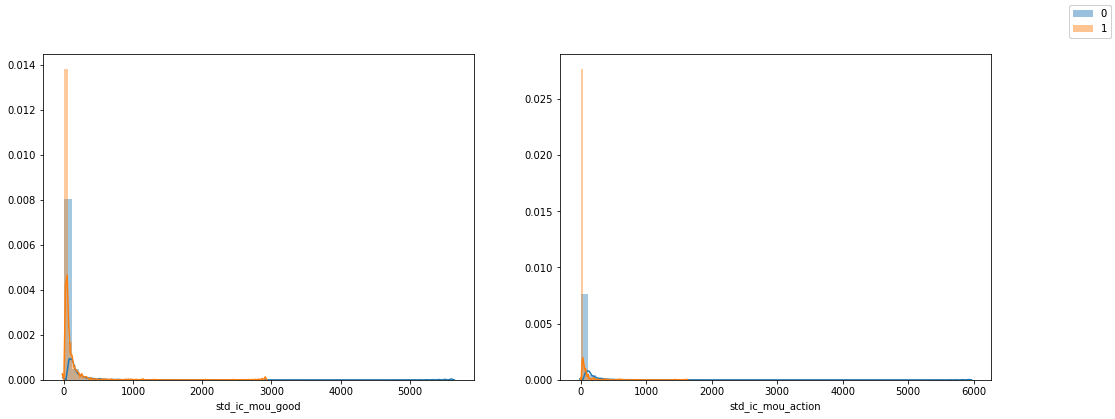

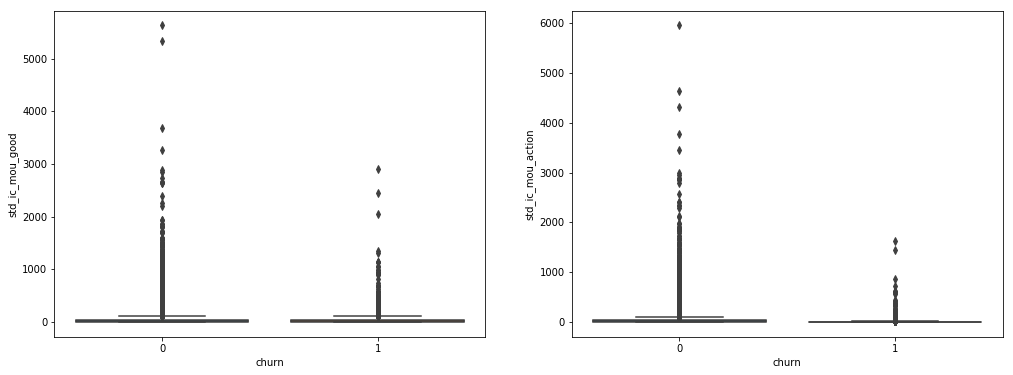

In [69]:
continous_plot(['std_ic_mou_good','std_ic_mou_action'],df_final)

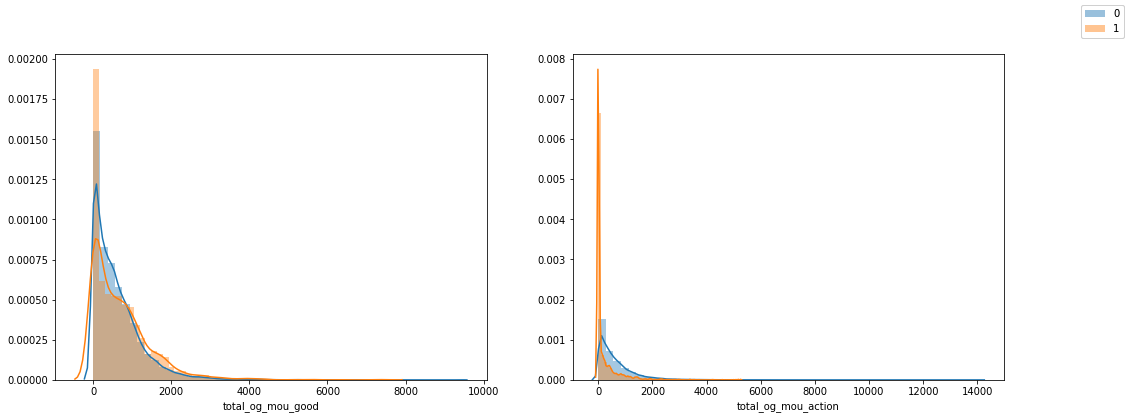

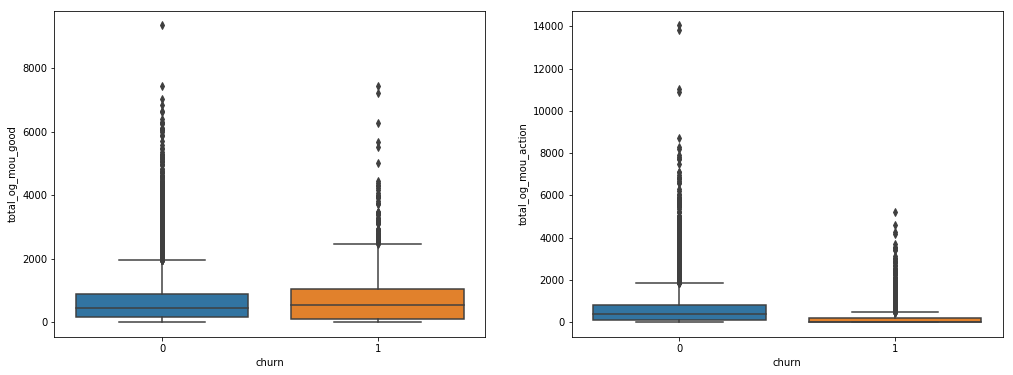

In [70]:
continous_plot(['total_og_mou_good','total_og_mou_action'],df_final)

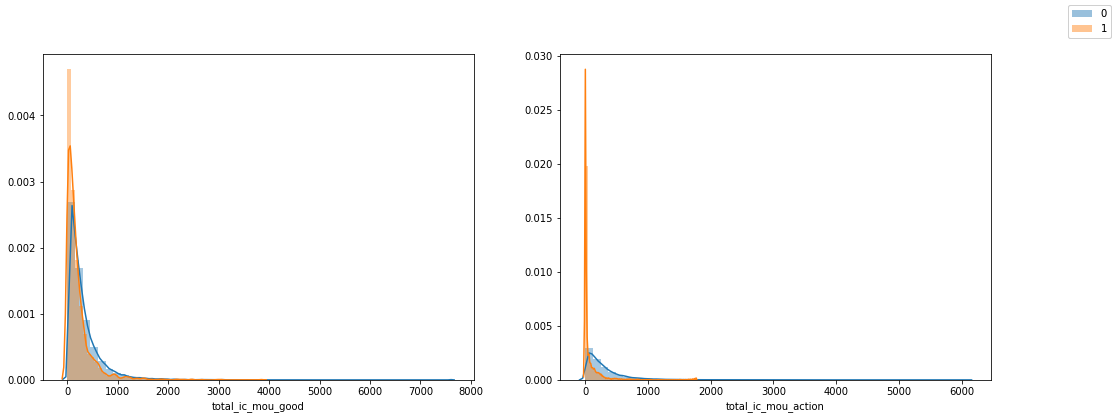

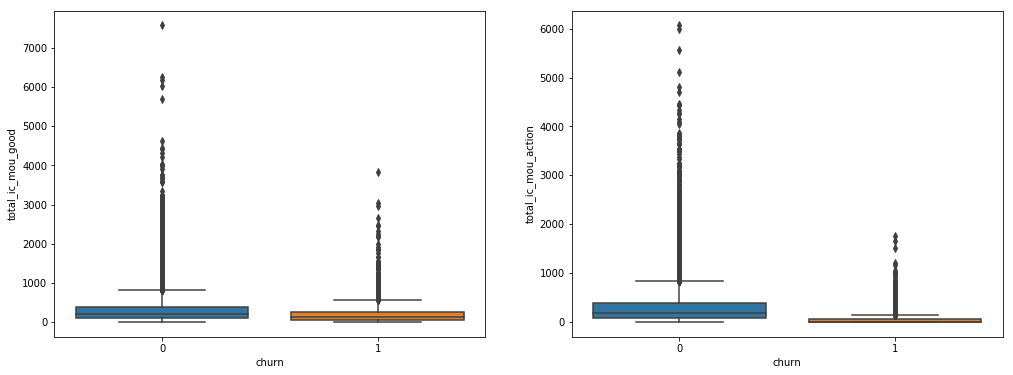

In [71]:
continous_plot(['total_ic_mou_good','total_ic_mou_action'],df_final)

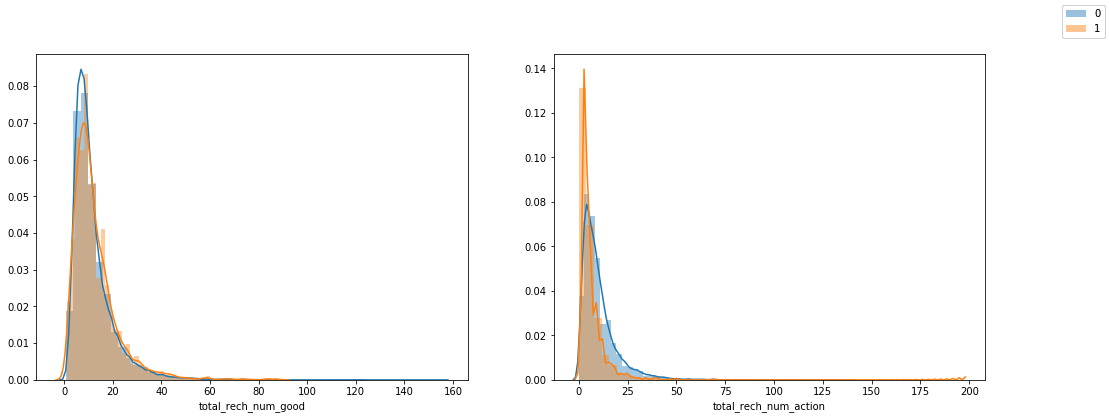

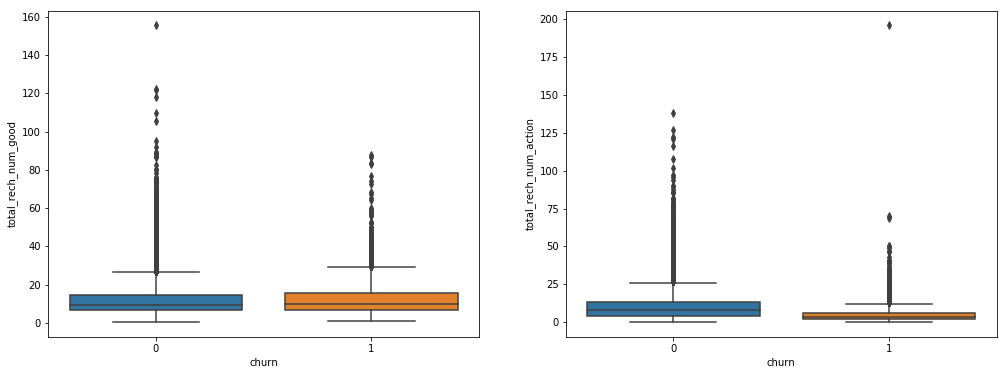

In [72]:
continous_plot(['total_rech_num_good','total_rech_num_action'],df_final)

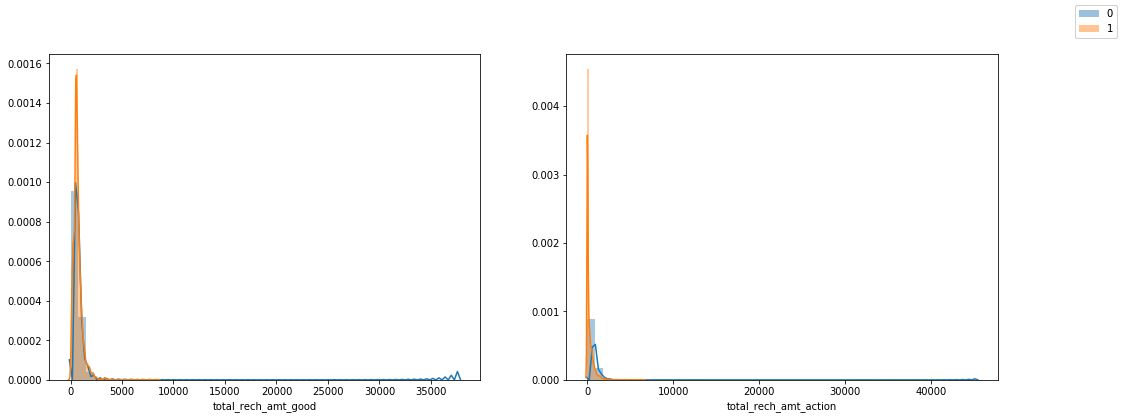

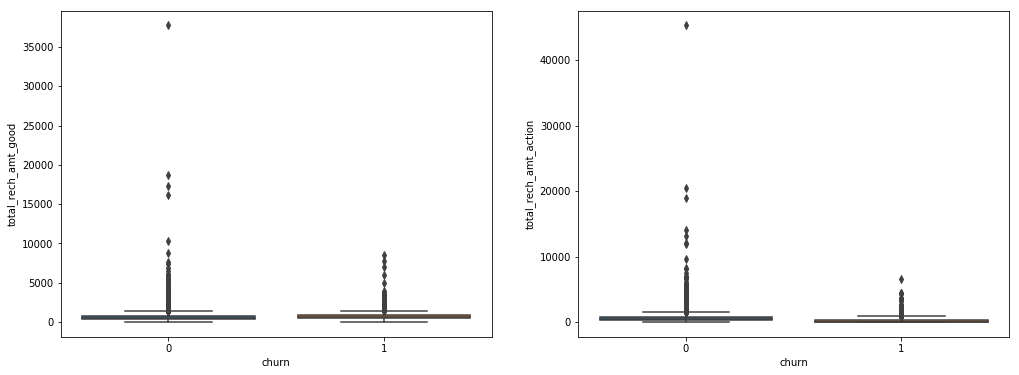

In [73]:
continous_plot(['total_rech_amt_good','total_rech_amt_action'],df_final)

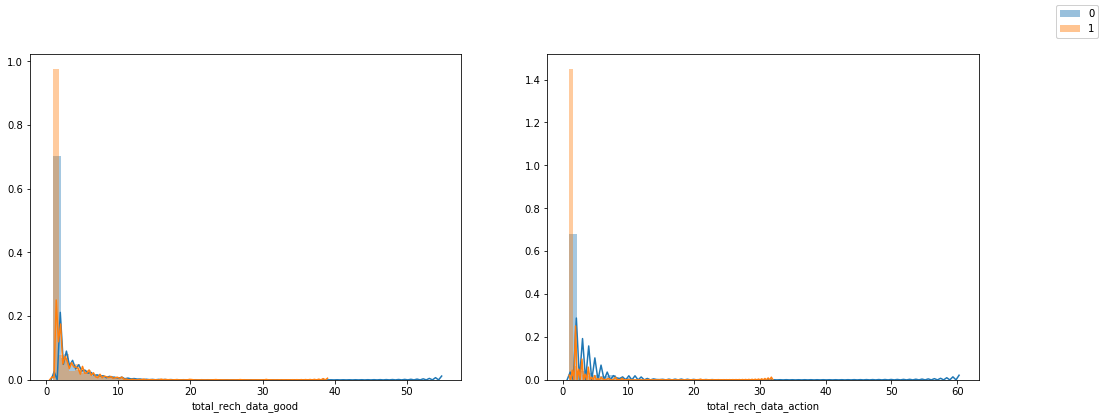

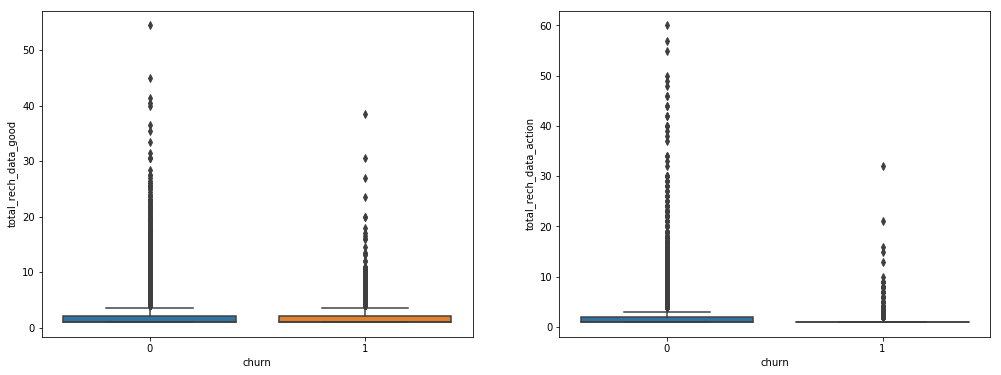

In [74]:
continous_plot(['total_rech_data_good','total_rech_data_action'],df_final)

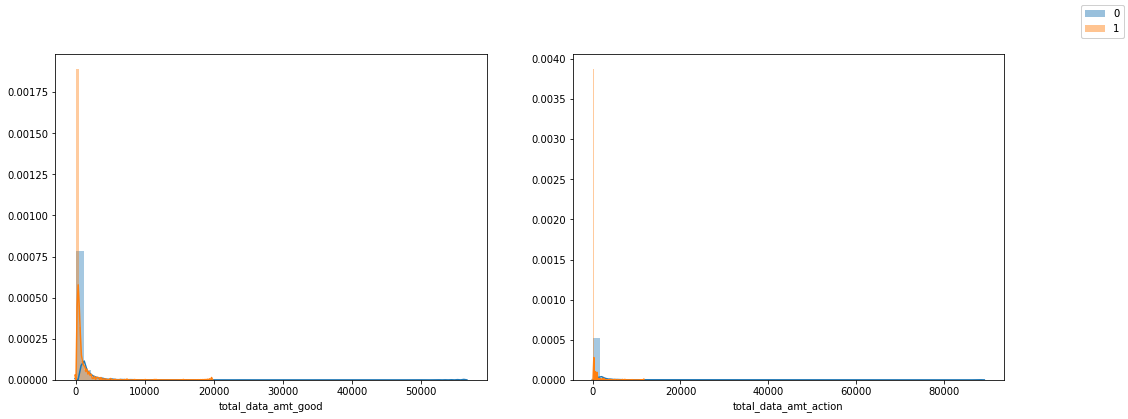

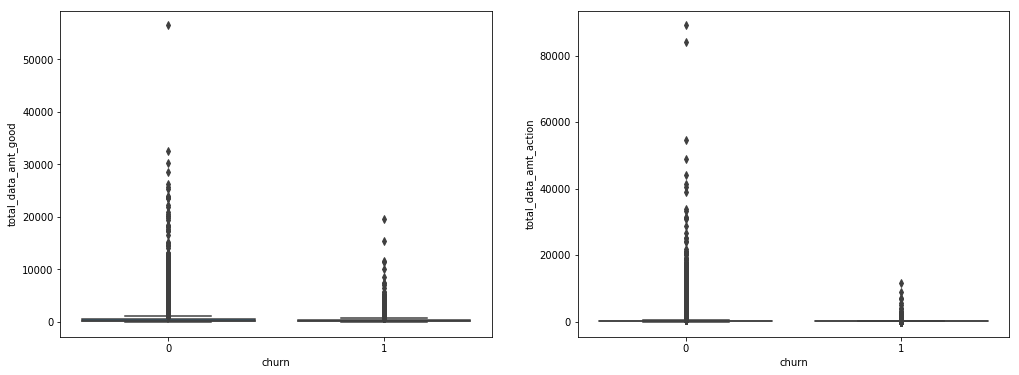

In [75]:
continous_plot(['total_data_amt_good','total_data_amt_action'],df_final)

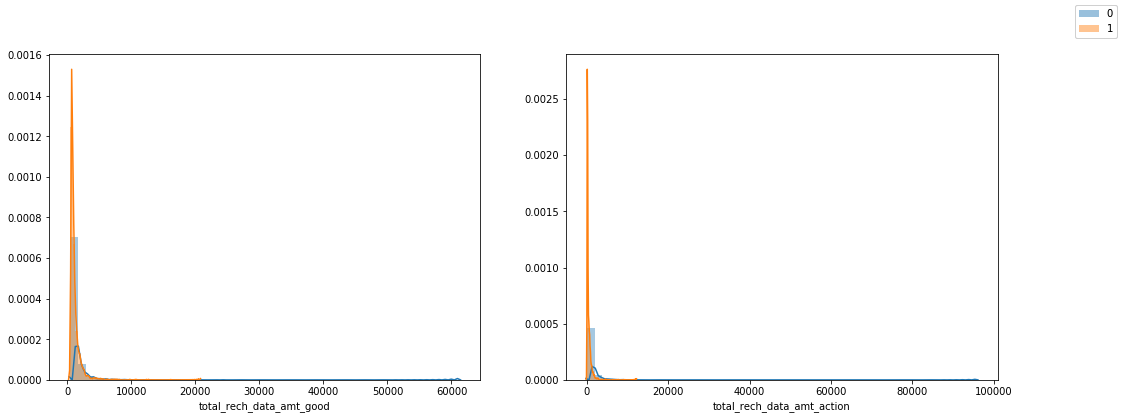

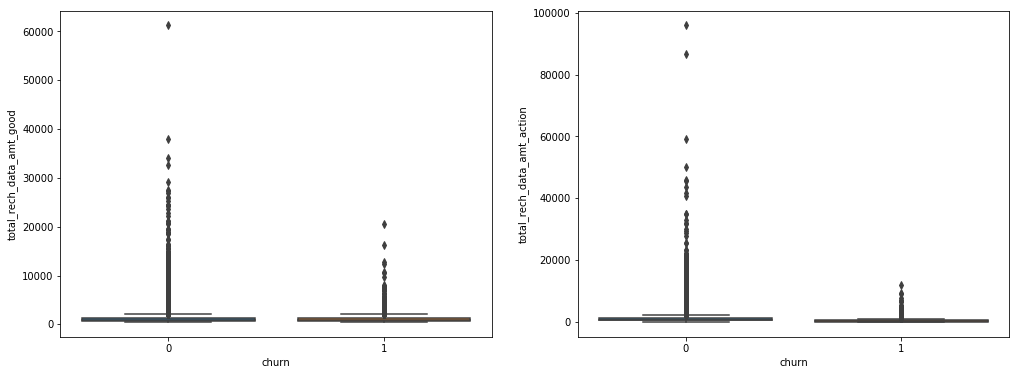

In [76]:
continous_plot(['total_rech_data_amt_good','total_rech_data_amt_action'],df_final)

### EDA Insights

total_rech_num , total_og_mou ,loc_ic_mou ,total_ic_mou ,av_rech_amt_data are some of the factor whihc seem to affect the churn rate the most according to the visualization

### Random Forest

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
df_final=df_final.drop(df_final.columns[df_final.columns.str.find('date')!=-1],axis=1)

In [79]:
# Putting feature variable to X
X = df_final.drop('churn',axis=1)

# Putting response variable to y
y = df_final['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [80]:
#X_train

In [81]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [82]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# Running the random forest with default parameters.
n_folds = 5

param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(10,50,10),
    'n_estimators': [100,200,300,400], 
    'max_features': [10,20]
}

rfc = RandomForestClassifier(class_weight="balanced")
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [83]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed: 35.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [84]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9336099585062241 using {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 10, 'n_estimators': 200}


### Tried different combination to get best recall 
#### (Telecoms might prefer to not miss any customer who might churn even at cost of identifying non churn customer as churn customers)

In [83]:
#rfc = RandomForestClassifier(class_weight="balanced")
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=20,
                             max_features=20,
                             n_estimators=400,class_weight="balanced")

In [84]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features=20,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [85]:
# Making predictions
predictions = rfc.predict(X_test)

In [86]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [87]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.98      0.93      0.95      8237
          1       0.50      0.74      0.60       749

avg / total       0.94      0.92      0.92      8986



In [88]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7692  545]
 [ 194  555]]


In [89]:
print(accuracy_score(y_test,predictions))

0.9177609614956599


### The max recall that could be achieved is 0.74 

In [90]:
# feature_importance
weightage = rfc.feature_importances_

# create dataframe
df_weight = pd.DataFrame({'cols': X.columns, 'weightage': weightage*100})


In [91]:
df_weight=df_weight.sort_values('weightage',ascending=False).reset_index()

In [92]:
df_weight[:60]['weightage'].sum()

95.6197601310151

In [93]:
df_weight[:60]['cols']

0              loc_ic_mou_action
1            total_ic_mou_action
2          loc_ic_t2m_mou_action
3          loc_ic_t2t_mou_action
4            total_og_mou_action
5             roam_og_mou_action
6        last_day_rch_amt_action
7     total_rech_data_amt_action
8          loc_og_t2m_mou_action
9             roam_ic_mou_action
10             loc_og_mou_action
11         total_rech_amt_action
12         loc_og_t2t_mou_action
13                   arpu_action
14         total_data_amt_action
15          max_rech_data_action
16              vol_2g_mb_action
17         loc_ic_t2f_mou_action
18              vol_3g_mb_action
19           max_rech_amt_action
20               std_og_mou_good
21       av_rech_amt_data_action
22                     arpu_good
23           total_rech_amt_good
24             std_ic_mou_action
25             total_ic_mou_good
26         std_ic_t2m_mou_action
27           total_rech_num_good
28             offnet_mou_action
29             total_og_mou_good
30        

### Logistic Regression

In [5]:
from sklearn.model_selection import train_test_split

In [94]:
# Putting feature variable to X
X = df_final.drop(['churn'], axis=1)

# Putting response variable to y
y = df_final['churn']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [95]:
#y_train

In [96]:
cat_list=['fb_user_6','fb_user_7','fb_user_8','night_pck_user_6','night_pck_user_7','night_pck_user_8']

In [97]:
#num_list=X_train[X_train.columns.difference(cat_list)].columns
num_list=X_train[X_train.columns.difference(cat_list)].columns

In [98]:
print(num_list)

Index(['aon', 'arpu_2g_action', 'arpu_2g_good', 'arpu_3g_action',
       'arpu_3g_good', 'arpu_action', 'arpu_good', 'av_rech_amt_data_action',
       'av_rech_amt_data_good', 'count_rech_2g_action',
       ...
       'total_rech_data_amt_good', 'total_rech_data_good',
       'total_rech_num_action', 'total_rech_num_good', 'vbc_3g_action',
       'vbc_3g_good', 'vol_2g_mb_action', 'vol_2g_mb_good', 'vol_3g_mb_action',
       'vol_3g_mb_good'],
      dtype='object', length=101)


In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train[num_list])
# Apply transform to both the training set and the test set.
X_train[num_list] = scaler.transform(X_train[num_list])
X_test[num_list] = scaler.transform(X_test[num_list])

###  Looking at Correlations

In [12]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

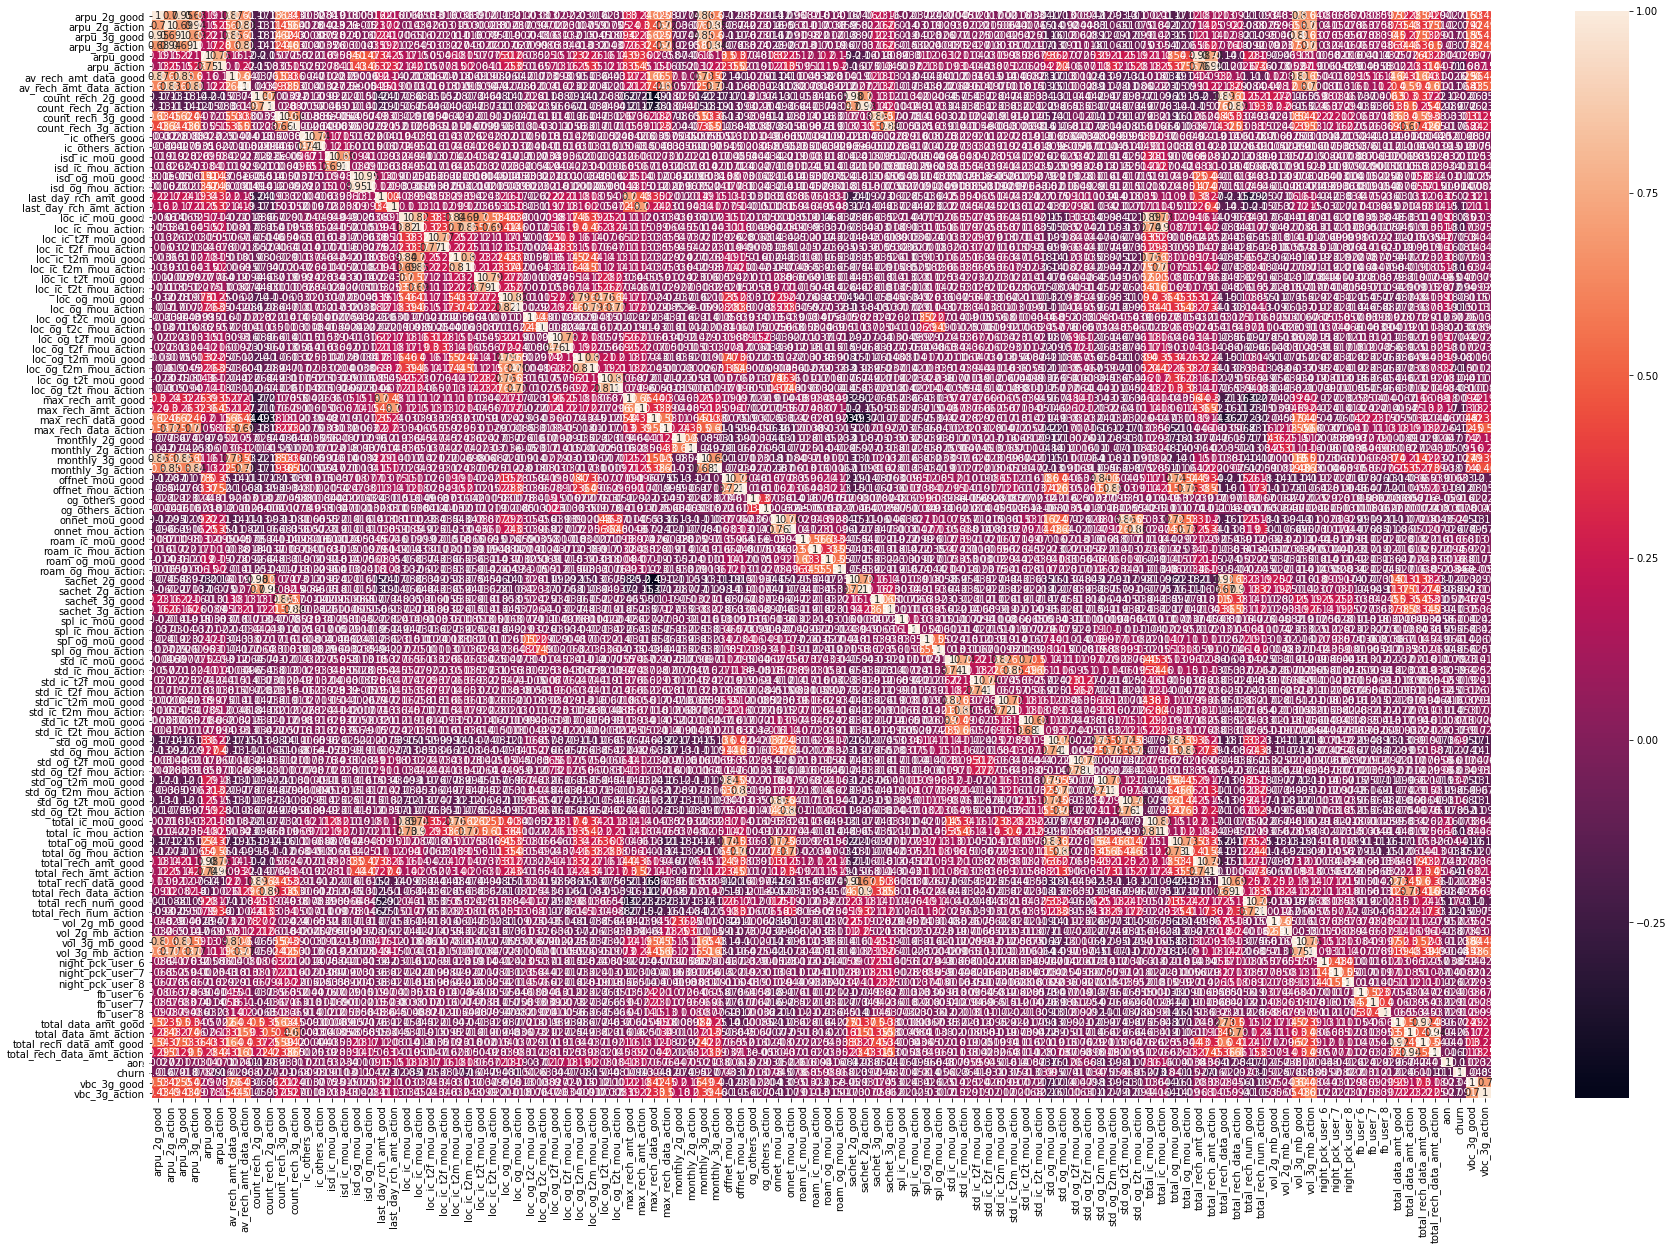

In [13]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(df_final.corr(),annot = True)
plt.show()

### Model Building


### Feature Selection Using RFE

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight="balanced")

In [15]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [16]:
rfe.support_

array([False, False, False, False,  True,  True,  True,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False,  True])

In [17]:
X_train.head()

arpu_2g_good  arpu_2g_action  arpu_3g_good  arpu_3g_action  arpu_good  \
5067      -0.448728       -0.385124     -0.428710       -0.371856   0.366646   
25362     -0.448728       -0.385124     -0.428710       -0.371856  -0.228623   
10076     -0.427494       -0.333628     -0.428710       -0.371856  -0.936176   
7679      -0.448728       -0.385124     -0.428710       -0.371856   0.781367   
14966     -0.324559       -0.385124     -0.403239       -0.341046  -1.035966   

       arpu_action  av_rech_amt_data_good  av_rech_amt_data_action  \
5067      0.285056              -0.333829                -0.253111   
25362    -0.923819              -0.333829                -0.253111   
10076    -0.653477              -0.476751                -0.430445   
7679      0.672291              -0.333829                -0.253111   
14966    -0.625888               0.714259                -0.253111   

       count_rech_2g_good  count_rech_2g_action      ...        fb_user_6  \
5067            -0.338756             -0.286539      ...              1.0   
25362           -0.338756             -0.286539      ...              1.0   
10076            2.800558              1.404985      ...              1.0   
7679            -0.338756             -0.286539      ...              1.0   
14966            0.109717             -0.286539      ...              1.0   

       fb_user_7  fb_user_8  total_data_amt_good  total_data_amt_action  \
5067         1.0        1.0            -0.332529              -0.244234   
25362        1.0        1.0            -0.332529              -0.244234   
10076        1.0        1.0             0.420963               0.053421   
7679         1.0        1.0            -0.332529              -0.244234   
14966        1.0        1.0             0.044217              -0.244234   

       total_rech_data_amt_good  total_rech_data_amt_action       aon  \
5067                  -0.154993                   -0.048476 -0.745158   
25362                 -0.425539                   -0.529196 -1.067043   
10076                  0.021305                   -0.171608 -0.342022   
7679                   0.022414                   -0.053536 -0.973290   
14966                 -0.371208                   -0.430803 -0.582654   

       vbc_3g_good  vbc_3g_action  
5067     -0.434737      -0.406953  
25362    -0.434737      -0.406953  
10076    -0.434737      -0.406953  
7679     -0.434737      -0.406953  
14966    -0.076849       2.800451  

[5 rows x 107 columns]

In [18]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_2g_good', False, 2),
 ('arpu_2g_action', False, 6),
 ('arpu_3g_good', False, 3),
 ('arpu_3g_action', False, 75),
 ('arpu_good', True, 1),
 ('arpu_action', True, 1),
 ('av_rech_amt_data_good', True, 1),
 ('av_rech_amt_data_action', True, 1),
 ('count_rech_2g_good', False, 25),
 ('count_rech_2g_action', True, 1),
 ('count_rech_3g_good', False, 62),
 ('count_rech_3g_action', True, 1),
 ('ic_others_good', False, 20),
 ('ic_others_action', False, 19),
 ('isd_ic_mou_good', False, 21),
 ('isd_ic_mou_action', False, 65),
 ('isd_og_mou_good', False, 42),
 ('isd_og_mou_action', True, 1),
 ('last_day_rch_amt_good', False, 43),
 ('last_day_rch_amt_action', True, 1),
 ('loc_ic_mou_good', False, 4),
 ('loc_ic_mou_action', True, 1),
 ('loc_ic_t2f_mou_good', False, 73),
 ('loc_ic_t2f_mou_action', False, 44),
 ('loc_ic_t2m_mou_good', False, 38),
 ('loc_ic_t2m_mou_action', True, 1),
 ('loc_ic_t2t_mou_good', False, 61),
 ('loc_ic_t2t_mou_action', True, 1),
 ('loc_og_mou_good', False, 74),
 ('loc_

In [19]:
col = X_train.columns[rfe.support_]

In [20]:
X_train.columns[~rfe.support_]

Index(['arpu_2g_good', 'arpu_2g_action', 'arpu_3g_good', 'arpu_3g_action',
       'count_rech_2g_good', 'count_rech_3g_good', 'ic_others_good',
       'ic_others_action', 'isd_ic_mou_good', 'isd_ic_mou_action',
       'isd_og_mou_good', 'last_day_rch_amt_good', 'loc_ic_mou_good',
       'loc_ic_t2f_mou_good', 'loc_ic_t2f_mou_action', 'loc_ic_t2m_mou_good',
       'loc_ic_t2t_mou_good', 'loc_og_mou_good', 'loc_og_mou_action',
       'loc_og_t2c_mou_good', 'loc_og_t2c_mou_action', 'loc_og_t2f_mou_good',
       'loc_og_t2f_mou_action', 'loc_og_t2m_mou_good', 'loc_og_t2m_mou_action',
       'loc_og_t2t_mou_good', 'loc_og_t2t_mou_action', 'max_rech_amt_good',
       'max_rech_amt_action', 'monthly_2g_good', 'monthly_3g_good',
       'offnet_mou_good', 'offnet_mou_action', 'og_others_good',
       'onnet_mou_good', 'onnet_mou_action', 'roam_ic_mou_good',
       'roam_ic_mou_action', 'roam_og_mou_good', 'roam_og_mou_action',
       'sachet_2g_good', 'sachet_3g_good', 'spl_ic_mou_good',
      

In [21]:
print(col)

Index(['arpu_good', 'arpu_action', 'av_rech_amt_data_good',
       'av_rech_amt_data_action', 'count_rech_2g_action',
       'count_rech_3g_action', 'isd_og_mou_action', 'last_day_rch_amt_action',
       'loc_ic_mou_action', 'loc_ic_t2m_mou_action', 'loc_ic_t2t_mou_action',
       'max_rech_data_good', 'max_rech_data_action', 'monthly_2g_action',
       'monthly_3g_action', 'og_others_action', 'sachet_2g_action',
       'sachet_3g_action', 'spl_ic_mou_action', 'std_ic_t2f_mou_action',
       'total_ic_mou_good', 'total_ic_mou_action', 'total_og_mou_action',
       'total_rech_data_good', 'total_rech_data_action',
       'total_rech_num_action', 'night_pck_user_8', 'fb_user_8', 'aon',
       'vbc_3g_action'],
      dtype='object')


In [22]:
#col=col_list

##### Assessing the model with StatsModels

In [23]:
import statsmodels.api as sm

In [24]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20938
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3916.3
Date:                Mon, 07 Oct 2019   Deviance:                       7832.6
Time:                        18:27:36   Pearson chi2:                 9.09e+05
No. Iterations:                   100   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.4280      0.183    -18.734      0.000      -3.787      -3.069
arpu_good                   0.5864      0.050     11.807      0.000       0.489       0.684
arpu_action                -0.1909      0.074     -2.575      0.010      -0.336      -0.046
av_rech_amt_data_good      -0.2996      0.070     -4.265      0.000      -0.437      -0.162
av_rech_amt_data_action     0.1411      0.125      1.130      0.258      -0.104       0.386
count_rech_2g_action        0.9230      0.276      3.341      0.001       0.382       1.464
count_rech_3g_action       -0.2845      0.043     -6.593      0.000      -0.369      -0.200
isd_og_mou_action          -0.3838      0.091     -4.194      0.000      -0.563      -0.204
last_day_rch_amt_action    -0.3888      0.057     -6.872      0.000      -0.500      -0.278
loc_ic_mou_action          -1.4330      0.815     -1.758      0.079      -3.031       0.165
loc_ic_t2m_mou_action      -0.3715      0.615     -0.605      0.545      -1.576       0.833
loc_ic_t2t_mou_action      -0.1493      0.438     -0.341      0.733      -1.007       0.708
max_rech_data_good          0.2795      0.065      4.330      0.000       0.153       0.406
max_rech_data_action       -0.1030      0.111     -0.924      0.356      -0.321       0.115
monthly_2g_action          -0.6569      0.086     -7.615      0.000      -0.826      -0.488
monthly_3g_action          -0.2117      0.076     -2.803      0.005      -0.360      -0.064
og_others_action           -2.6426      2.540     -1.041      0.298      -7.620       2.335
sachet_2g_action           -2.2234      0.433     -5.138      0.000      -3.072      -1.375
sachet_3g_action           -0.2109      0.056     -3.738      0.000      -0.321      -0.100
spl_ic_mou_action          -0.7531      0.112     -6.718      0.000      -0.973      -0.533
std_ic_t2f_mou_action      -0.1796      0.139     -1.294      0.196      -0.452       0.092
total_ic_mou_good           0.5313      0.059      9.016      0.000       0.416       0.647
total_ic_mou_action        -0.9494      0.179     -5.292      0.000      -1.301      -0.598
total_og_mou_action        -0.6400      0.068     -9.441      0.000      -0.773      -0.507
total_rech_data_good        0.3847      0.054      7.190      0.000       0.280       0.490
total_rech_data_action      0.6521      0.226      2.882      0.004       0.209       1.096
total_rech_num_action      -0.3579      0.060     -5.981      0.000      -0.475      -0.241
night_pck_user_8           -0.4742      0.498     -0.952      0.341      -1.451       0.502
fb_user_8                  -0.9487      0.172     -5.522      0.000      -1.285      -0.612
aon                        -0.2557      0.038     -6.721      0.000      -0.330      -0.181
vbc_3g_action              -0.3815      0.079     -4.858      0.000      -0.535      -0.228
==================================

In [25]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
#y_train_pred[:10]
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.89803042e-03, 6.00032542e-01, 2.85223388e-02, 8.64622822e-03,
       3.23955836e-03, 9.29028402e-03, 6.63701388e-02, 5.47945602e-02,
       1.38186032e-03, 9.79465897e-09])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [26]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churn  Churn_Prob
0      0    0.009898
1      0    0.600033
2      0    0.028522
3      0    0.008646
4      0    0.003240

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.3 else 0

In [27]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.009898          0
1      0    0.600033          1
2      0    0.028522          0
3      0    0.008646          0
4      0    0.003240          0

In [28]:
from sklearn import metrics

In [29]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18338   877]
 [  661  1091]]


In [30]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9266466351886298


In [31]:
print(metrics.classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96     19215
          1       0.55      0.62      0.59      1752

avg / total       0.93      0.93      0.93     20967



#### Checking VIFs

In [32]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features        VIF
24   total_rech_data_action        inf
4      count_rech_2g_action        inf
5      count_rech_3g_action        inf
17         sachet_3g_action        inf
14        monthly_3g_action        inf
16         sachet_2g_action  90.220000
8         loc_ic_mou_action  57.340000
9     loc_ic_t2m_mou_action  30.250000
10    loc_ic_t2t_mou_action  14.320000
21      total_ic_mou_action   7.000000
3   av_rech_amt_data_action   5.940000
12     max_rech_data_action   5.820000
11       max_rech_data_good   4.390000
1               arpu_action   4.250000
2     av_rech_amt_data_good   4.100000
23     total_rech_data_good   3.230000
20        total_ic_mou_good   3.170000
0                 arpu_good   2.960000
13        monthly_2g_action   2.780000
22      total_og_mou_action   1.960000
25    total_rech_num_action   1.720000
6         isd_og_mou_action   1.580000
29            vbc_3g_action   1.530000
7   last_day_rch_amt_action   1.280000
28                      aon   1.100000
26         night_pck_user_8   1.090000
19    std_ic_t2f_mou_action   1.060000
18        spl_ic_mou_action   1.030000
27                fb_user_8   1.030000
15         og_others_action   1.000000

In [34]:
def drop_col(col_name,col):
    col = col.drop(col_name, 1)
    # Let's re-run the model using the selected variables
    X_train_sm = sm.add_constant(X_train[col])
    logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    print(res.summary())
    #return res
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    y_train_pred_final['Churn_Prob'] = y_train_pred
    y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)
    #y_train_pred_final.head()
    print('Metrics : ')
    print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
    print(metrics.classification_report(y_train_pred_final.Churn,y_train_pred_final.predicted))
    print(metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted ))
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return res,col,y_train_pred_final

In [35]:
res,col,y_train_pred_final=drop_col('loc_ic_t2t_mou_action',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20939
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3916.3
Date:                Mon, 07 Oct 2019   Deviance:                       7832.7
Time:                        18:27:40   Pearson chi2:                 9.11e+05
No. Iterations:                    56   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.4288      0.183    -18.740      0.000      -3.787      -3.070
arpu_good    

In [36]:
res,col,y_train_pred_final=drop_col('loc_ic_t2m_mou_action',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20940
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3916.5
Date:                Mon, 07 Oct 2019   Deviance:                       7833.1
Time:                        18:27:42   Pearson chi2:                 8.64e+05
No. Iterations:                    30   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.4311      0.183    -18.756      0.000      -3.790      -3.073
arpu_good    

In [37]:
res,col,y_train_pred_final=drop_col('max_rech_data_action',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20941
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3917.0
Date:                Mon, 07 Oct 2019   Deviance:                       7833.9
Time:                        18:27:46   Pearson chi2:                 8.63e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.4070      0.181    -18.802      0.000      -3.762      -3.052
arpu_good    

In [38]:
res,col,y_train_pred_final=drop_col('night_pck_user_8',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20942
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3917.5
Date:                Mon, 07 Oct 2019   Deviance:                       7835.0
Time:                        18:27:49   Pearson chi2:                 8.78e+05
No. Iterations:                    82   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.4139      0.181    -18.851      0.000      -3.769      -3.059
arpu_good    

In [39]:
res,col,y_train_pred_final=drop_col('og_others_action',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20943
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3920.0
Date:                Mon, 07 Oct 2019   Deviance:                       7839.9
Time:                        18:27:51   Pearson chi2:                 8.86e+05
No. Iterations:                    75   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.3754      0.177    -19.104      0.000      -3.722      -3.029
arpu_good    

In [40]:
res,col,y_train_pred_final=drop_col('std_ic_t2f_mou_action',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20944
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3921.1
Date:                Mon, 07 Oct 2019   Deviance:                       7842.2
Time:                        18:27:54   Pearson chi2:                 8.87e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.3696      0.177    -19.035      0.000      -3.717      -3.023
arpu_good    

In [41]:
res,col,y_train_pred_final=drop_col('count_rech_2g_action',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20944
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3921.1
Date:                Mon, 07 Oct 2019   Deviance:                       7842.2
Time:                        18:27:56   Pearson chi2:                 8.87e+05
No. Iterations:                    28   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.3697      0.177    -19.077      0.000      -3.716      -3.024
arpu_good    

In [42]:
res,col,y_train_pred_final=drop_col('count_rech_3g_action',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20944
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3921.1
Date:                Mon, 07 Oct 2019   Deviance:                       7842.2
Time:                        18:27:57   Pearson chi2:                 8.87e+05
No. Iterations:                     9   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.3697      0.177    -19.077      0.000      -3.716      -3.024
arpu_good    

In [43]:
res,col,y_train_pred_final=drop_col('total_rech_data_action',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20945
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3936.2
Date:                Mon, 07 Oct 2019   Deviance:                       7872.4
Time:                        18:27:58   Pearson chi2:                 8.64e+05
No. Iterations:                     9   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.7909      0.161    -23.580      0.000      -4.106      -3.476
arpu_good    

In [44]:
res,col,y_train_pred_final=drop_col('total_ic_mou_action',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20946
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3964.4
Date:                Mon, 07 Oct 2019   Deviance:                       7928.8
Time:                        18:27:59   Pearson chi2:                 1.32e+06
No. Iterations:                     9   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.7616      0.160    -23.514      0.000      -4.075      -3.448
arpu_good    

In [45]:
res,col,y_train_pred_final=drop_col('arpu_action',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20947
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3971.9
Date:                Mon, 07 Oct 2019   Deviance:                       7943.8
Time:                        18:28:00   Pearson chi2:                 1.89e+06
No. Iterations:                     9   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.7809      0.160    -23.633      0.000      -4.094      -3.467
arpu_good    

In [46]:
res,col,y_train_pred_final=drop_col('av_rech_amt_data_good',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20948
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3985.2
Date:                Mon, 07 Oct 2019   Deviance:                       7970.5
Time:                        18:28:01   Pearson chi2:                 1.64e+06
No. Iterations:                     9   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.8289      0.160    -23.976      0.000      -4.142      -3.516
arpu_good    

In [47]:
res,col,y_train_pred_final=drop_col('max_rech_data_good',col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20967
Model:                            GLM   Df Residuals:                    20949
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3985.4
Date:                Mon, 07 Oct 2019   Deviance:                       7970.7
Time:                        18:28:02   Pearson chi2:                 1.67e+06
No. Iterations:                     9   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.8263      0.160    -23.976      0.000      -4.139      -3.514
arpu_good    

###  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [48]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [49]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

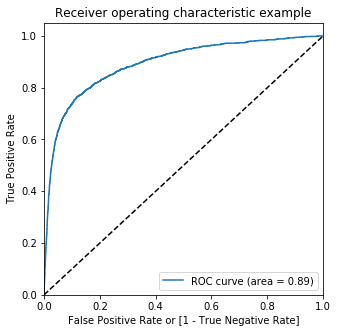

In [50]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

###  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [51]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.019756          0    1    0    0    0    0    0    0    0    0   
1      0    0.513959          1    1    1    1    1    1    1    0    0    0   
2      0    0.024997          0    1    0    0    0    0    0    0    0    0   
3      0    0.005492          0    1    0    0    0    0    0    0    0    0   
4      0    0.003904          0    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [52]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.083560  1.000000  0.000000
0.1   0.1  0.824009  0.810502  0.825241
0.2   0.2  0.899652  0.714041  0.916576
0.3   0.3  0.924977  0.621575  0.952641
0.4   0.4  0.933610  0.485731  0.974447
0.5   0.5  0.927171  0.239155  0.989904
0.6   0.6  0.922497  0.106735  0.996877
0.7   0.7  0.919063  0.043950  0.998855
0.8   0.8  0.917632  0.019977  0.999480
0.9   0.9  0.916726  0.005708  0.999792


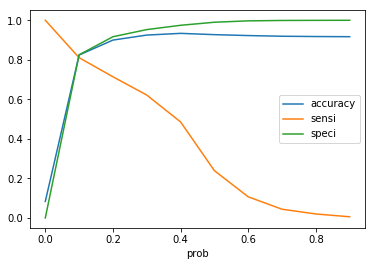

In [53]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Making predictions on the test set

In [54]:
X_test = X_test[col]
X_test.head()

arpu_good  av_rech_amt_data_action  isd_og_mou_action  \
14483  15.192467                -0.253111          -0.039759   
8922   -0.428218                -0.100237           0.099313   
15014  -0.390335                -0.277571          -0.039759   
19846  -0.196116                -1.054170          -0.039759   
27504   1.080826                -0.253111          -0.039759   

       last_day_rch_amt_action  loc_ic_mou_action  monthly_2g_action  \
14483                 1.102335           0.008524          -0.378158   
8922                 -0.645738           1.341043          -0.378158   
15014                -0.470931           0.530787          -0.378158   
19846                -0.296124          -0.109556          -0.378158   
27504                -0.645738           0.297817          -0.378158   

       monthly_3g_action  sachet_2g_action  sachet_3g_action  \
14483          -0.341319         -0.415216         -0.186735   
8922            1.243365         -0.415216         -0.186735   
15014          -0.341319          1.942384         -0.186735   
19846          -0.341319         -0.022283         -0.186735   
27504          -0.341319         -0.415216         -0.186735   

       spl_ic_mou_action  total_ic_mou_good  total_og_mou_action  \
14483          -0.251626          -0.099222             0.623676   
8922           -0.251626           0.898464            -0.328395   
15014          -0.251626          -0.069666            -0.518844   
19846          -0.251626           2.068305             0.107060   
27504           0.704888           1.790152             0.148537   

       total_rech_data_good  total_rech_num_action  fb_user_8       aon  \
14483             -0.479894               0.221064        1.0 -1.001416   
8922              -0.479894              -0.318359        1.0  2.854945   
15014              3.314801               1.192025        1.0 -0.761826   
19846             -0.479894               0.652602        0.0 -0.748283   
27504             -0.479894              -0.210475        1.0 -0.482651   

       vbc_3g_action  
14483      -0.406953  
8922       -0.406953  
15014       0.655999  
19846      -0.406953  
27504      -0.406953

In [55]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [56]:
y_test_pred = res.predict(X_test_sm)

In [57]:
y_test_pred[:10]

14483    0.986377
8922     0.000414
15014    0.001571
19846    0.088295
27504    0.040617
17053    0.000095
1032     0.000130
14634    0.000085
10314    0.005983
18995    0.017761
dtype: float64

In [58]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [59]:
# Let's see the head
y_pred_1.head()

0
14483  0.986377
8922   0.000414
15014  0.001571
19846  0.088295
27504  0.040617

In [60]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [61]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [62]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [63]:
y_pred_final.head()

churn         0
0      0  0.986377
1      0  0.000414
2      0  0.001571
3      0  0.088295
4      0  0.040617

In [64]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [65]:
# Let's see the head of y_pred_final
y_pred_final.head()

churn  Churn_Prob
0      0    0.986377
1      0    0.000414
2      0    0.001571
3      0    0.088295
4      0    0.040617

In [66]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [67]:
y_pred_final.head()

churn  Churn_Prob  final_predicted
0      0    0.986377                1
1      0    0.000414                0
2      0    0.001571                0
3      0    0.088295                0
4      0    0.040617                0

In [68]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.9274426886267527

In [69]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[7904,  401],
       [ 251,  430]], dtype=int64)

In [70]:
print(metrics.classification_report(y_pred_final.churn,y_pred_final.final_predicted))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96      8305
          1       0.52      0.63      0.57       681

avg / total       0.93      0.93      0.93      8986



In [82]:
print(metrics.roc_auc_score(y_pred_final.churn,y_pred_final.final_predicted))

0.7915701048764036


## The factors that mostly effect customer churn are below: -

1) Arpu - higher cost for services used by customer is effecting churn rate it can be reduced to retain more customers.

2) Data rates seem to be important factor is customer churn so making sure data plan is best in market is more helpful in     retaining customers.

3) The more customer uses local incoming calls more he is likely to retain so such customer need not be incentivized.

4) Fb usage is imporatnt factor is retain customer, perhaps only fb free access without data pack is very helpful to make sure      customers dont churn.

5) ISD outgoing rates are important factor whihc effect churn, so reducing or giving better plans than competitor is helpful in 
   retaining customers.
   
6) Lot of the decisions above analysis is dependent on Action month so significant change in any of the above mentioned factors    is surely not ignorable.


### PCA and Logistic Regression

In [130]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [131]:
#Fitting the PCA to training data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [132]:
#Checking the PCA components
pca.components_

array([[ 2.40092046e-01,  2.39108752e-01,  2.39223268e-01, ...,
         1.47175218e-02,  1.73772596e-01,  1.67285025e-01],
       [ 2.30623171e-02,  3.90018381e-02,  3.10925985e-02, ...,
         5.35633431e-02,  1.51613088e-02,  2.36189932e-02],
       [-3.58757432e-03,  2.28112438e-02, -5.72368639e-03, ...,
        -9.77657162e-02, -3.49984827e-02, -2.73889507e-02],
       ...,
       [-0.00000000e+00, -9.02056208e-17,  2.39436523e-16, ...,
         6.93889390e-18, -1.38777878e-17,  4.85722573e-17],
       [ 0.00000000e+00,  8.32667268e-17,  1.56003740e-18, ...,
         2.25514052e-17,  9.36750677e-17, -1.52655666e-16],
       [-0.00000000e+00, -3.46944695e-18, -2.02160287e-16, ...,
        -7.63278329e-17, -1.09287579e-16,  1.80411242e-16]])

In [133]:
#Checking the variance ratio of principle components
pca.explained_variance_ratio_

array([1.18478907e-01, 1.07091435e-01, 7.51317196e-02, 6.64648141e-02,
       4.17852853e-02, 3.63389642e-02, 2.98836339e-02, 2.61509527e-02,
       2.57711009e-02, 2.46977285e-02, 2.35946905e-02, 2.21721229e-02,
       2.17595002e-02, 2.01762787e-02, 1.91979087e-02, 1.86118317e-02,
       1.67648099e-02, 1.61022586e-02, 1.49406061e-02, 1.44814200e-02,
       1.24228979e-02, 1.23351678e-02, 1.21640694e-02, 1.14363968e-02,
       1.10363291e-02, 1.07935879e-02, 1.02095612e-02, 9.33126699e-03,
       8.71518222e-03, 8.47050322e-03, 8.20601322e-03, 8.08782963e-03,
       7.89406580e-03, 7.38150963e-03, 6.97132955e-03, 6.90653928e-03,
       6.55486142e-03, 6.23164611e-03, 5.96158198e-03, 5.77939397e-03,
       5.52150634e-03, 5.03806316e-03, 4.88235320e-03, 4.42086973e-03,
       4.33463181e-03, 4.19880423e-03, 3.30388162e-03, 3.13485116e-03,
       3.03507720e-03, 2.95458986e-03, 2.86815699e-03, 2.71716427e-03,
       2.56290504e-03, 2.47691667e-03, 2.33006637e-03, 2.27214629e-03,
      

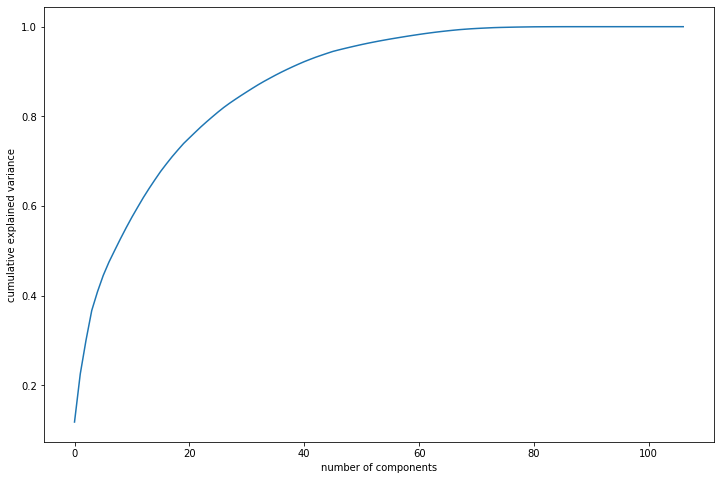

In [134]:
#Checking for optimum no. of principal components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [135]:
#Using 40 principal components as it explains upto 90% variance
pca = PCA(n_components=40,random_state=100)

In [136]:
# fit_transform and transform to get the reduced data
Xtrain_reduced = pca.fit_transform(X_train)
Xtest_reduced =  pca.transform(X_test)

In [138]:
train_pca = pd.DataFrame(data = Xtrain_reduced)
test_pca = pd.DataFrame(data = Xtest_reduced)

In [139]:
#Using Logistic regression model to train the data
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(train_pca, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
y_pred = logreg.predict(test_pca)
y_pred_proba = logreg.predict_proba(test_pca)[:, 1]
y_pred = pd.DataFrame(y_pred)

In [183]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[6565, 1740],
       [ 104,  577]], dtype=int64)

In [184]:
accuracy_score(y_test, y_pred)

0.7947918985087915

In [185]:
metrics.recall_score(y_test, y_pred)

0.8472834067547724

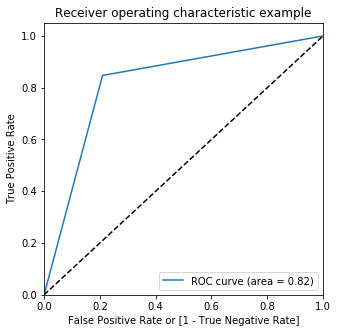

In [186]:
draw_roc(y_test, y_pred)